<a href="https://colab.research.google.com/github/MarcoBarrionuevo/MarcoBarrionuevo/blob/main/Con_APC_Proyecto3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS POR COMPONENTES - PCA


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
# Divide los datos en train y  test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from keras.optimizers import SGD
## Para el Análisis de APC
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
data_frame = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')
data_frame.info()
num_componentes_PCA=4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [3]:
data_frame['Ram'] = data_frame['Ram'].apply(lambda x: int(x.replace('GB','')))
#df['age']=df.apply(lambda x: x['age']+3,axis=1)
data_frame['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [4]:
data_frame['Weight'] = data_frame['Weight'].apply(lambda x: float(x.replace('kg','')))

In [5]:
data_aux = data_frame.drop(['laptop_ID','Product'],axis=1)
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [6]:
data_final = pd.get_dummies(data_aux)

In [7]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 345 entries, Inches to OpSys_macOS
dtypes: float64(3), int64(1), uint8(341)
memory usage: 474.8 KB


In [8]:
data_final.shape
data_final.describe()

Inches          Ram  ...  OpSys_Windows 7  OpSys_macOS
count  1303.000000  1303.000000  ...      1303.000000  1303.000000
mean     15.017191     8.382195  ...         0.034536     0.009977
std       1.426304     5.084665  ...         0.182671     0.099423
min      10.100000     2.000000  ...         0.000000     0.000000
25%      14.000000     4.000000  ...         0.000000     0.000000
50%      15.600000     8.000000  ...         0.000000     0.000000
75%      15.600000     8.000000  ...         0.000000     0.000000
max      18.400000    64.000000  ...         1.000000     1.000000

[8 rows x 345 columns]

In [9]:
data_final.isnull().sum()

Inches                0
Ram                   0
Weight                0
Price_euros           0
Company_Acer          0
                     ..
OpSys_No OS           0
OpSys_Windows 10      0
OpSys_Windows 10 S    0
OpSys_Windows 7       0
OpSys_macOS           0
Length: 345, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb987aa9fd0>,
      dtype=object)

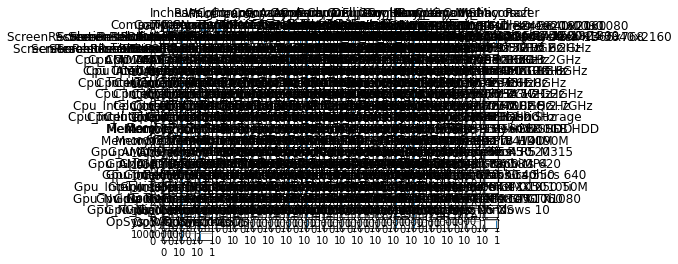

In [10]:
data_final.hist()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


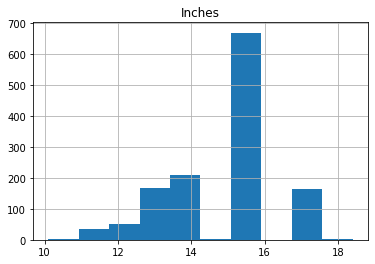

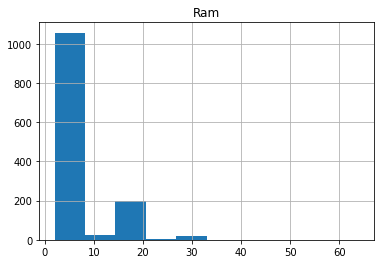

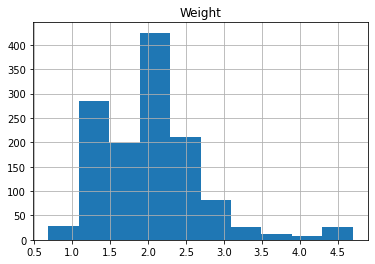

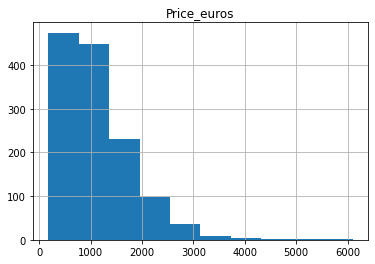

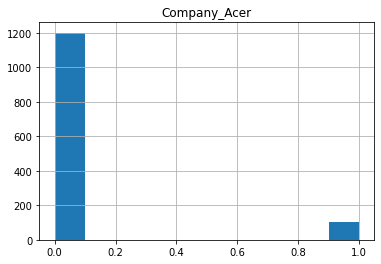

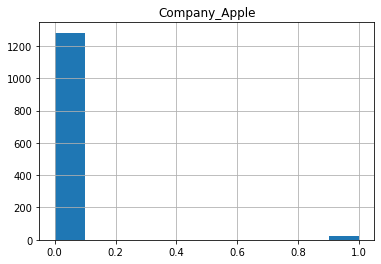

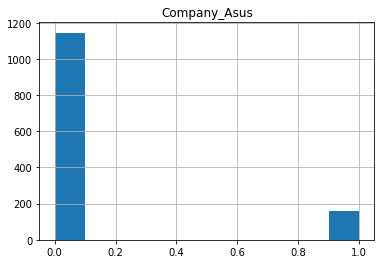

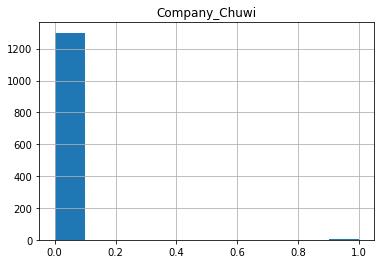

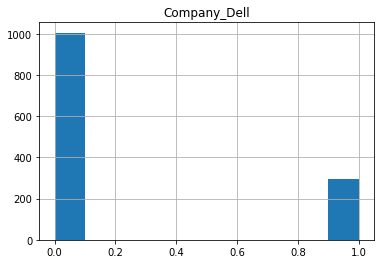

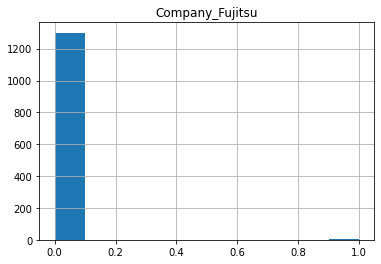

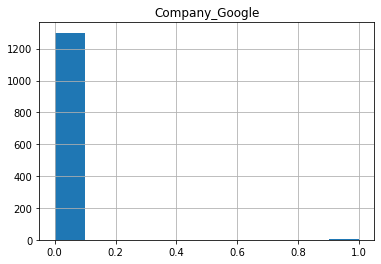

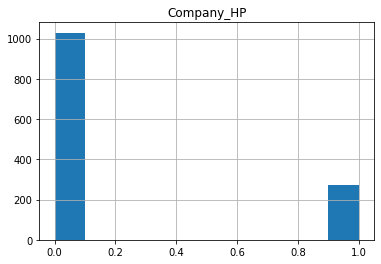

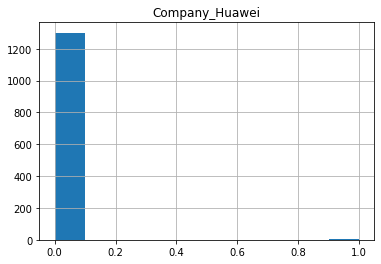

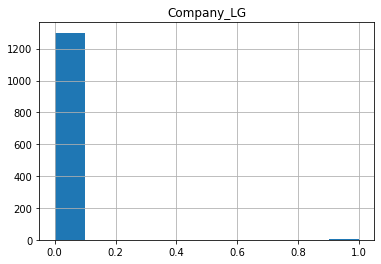

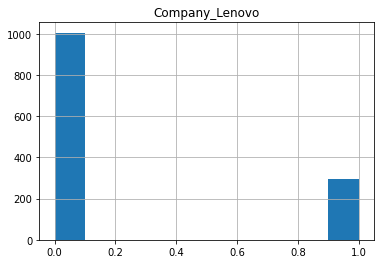

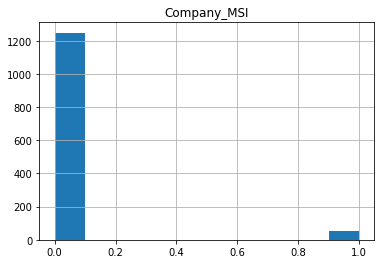

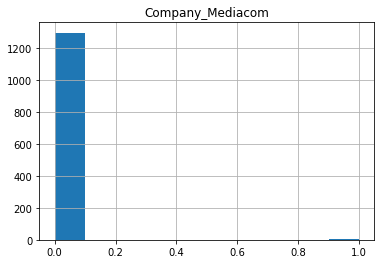

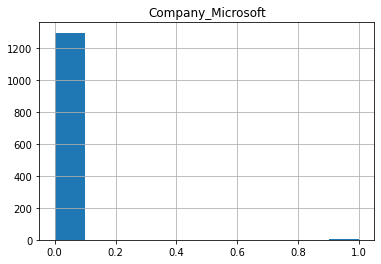

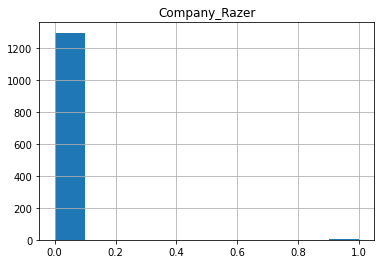

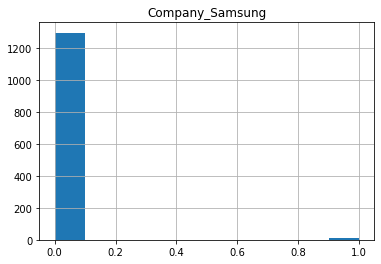

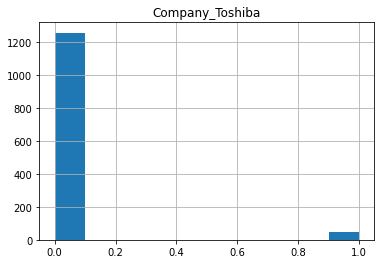

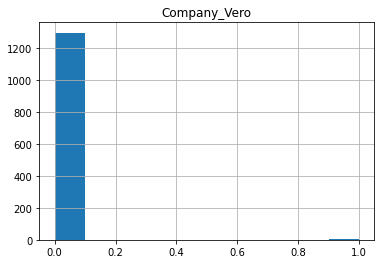

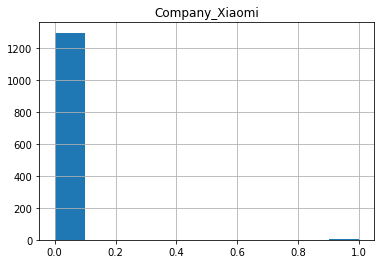

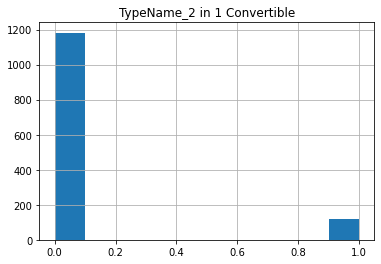

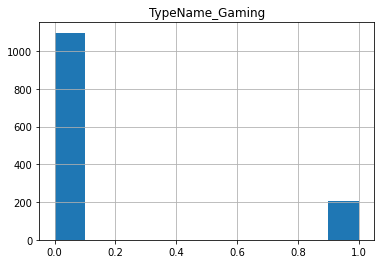

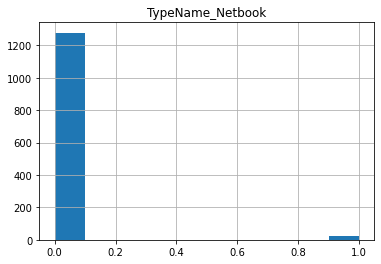

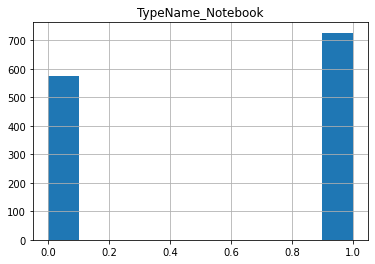

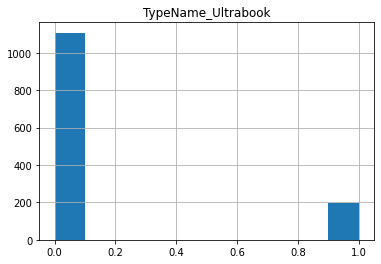

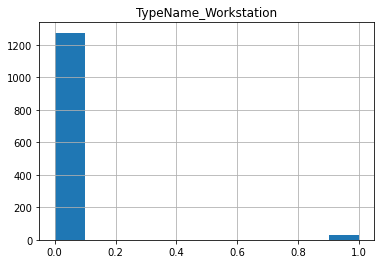

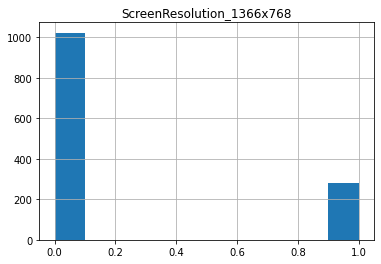

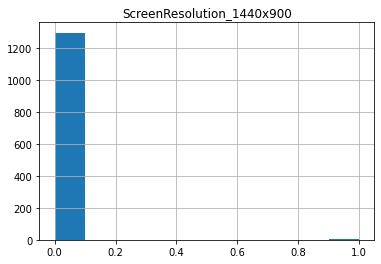

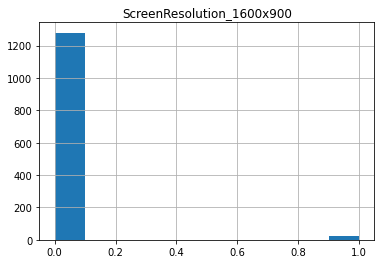

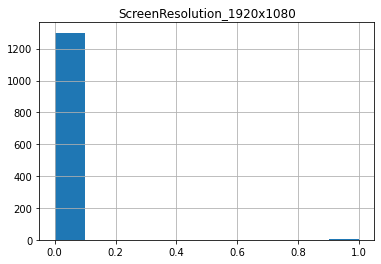

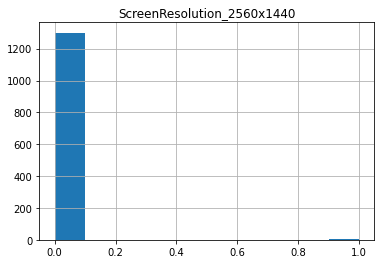

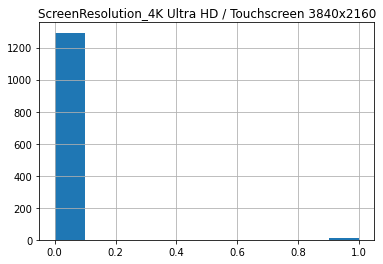

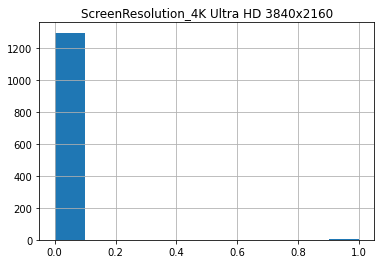

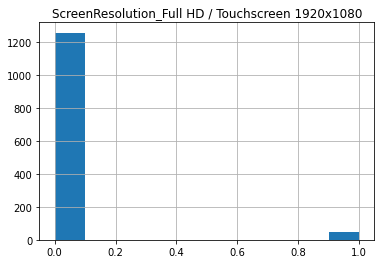

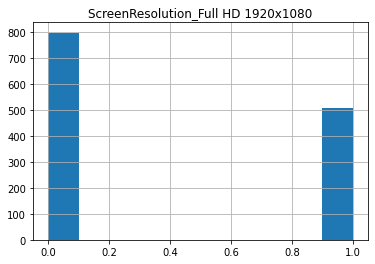

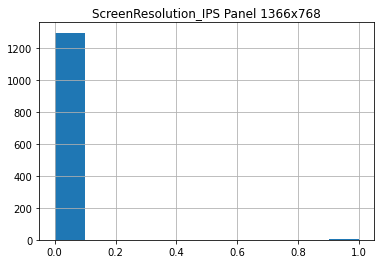

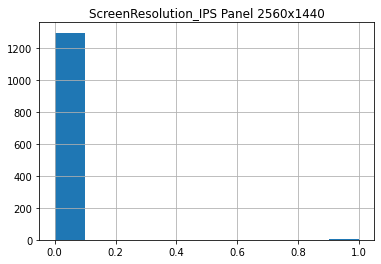

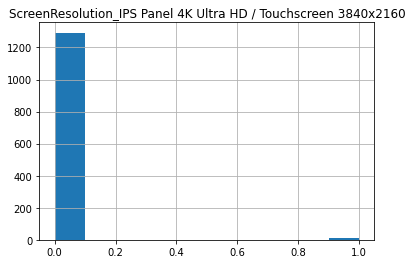

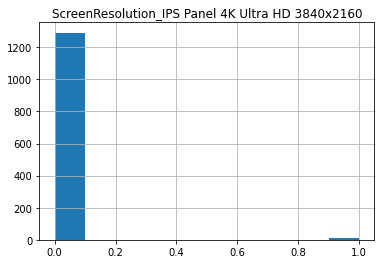

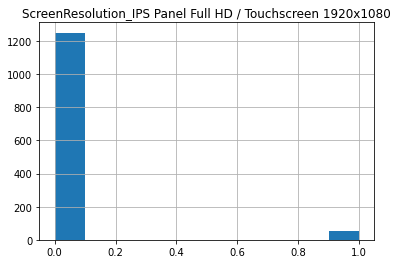

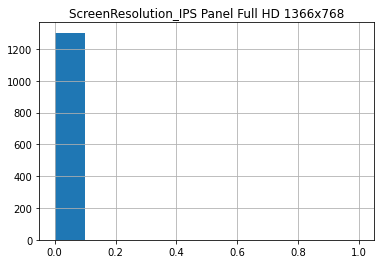

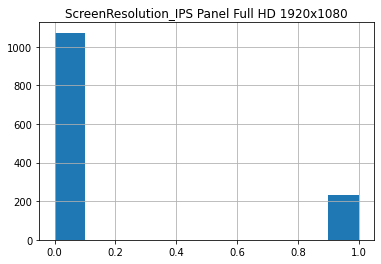

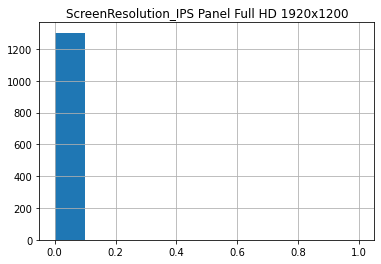

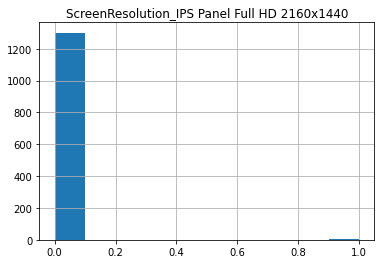

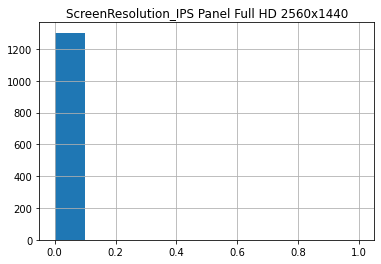

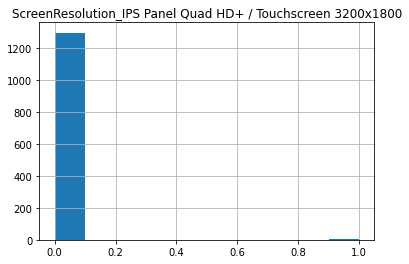

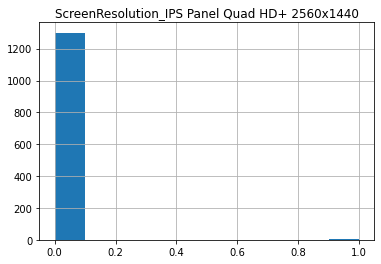

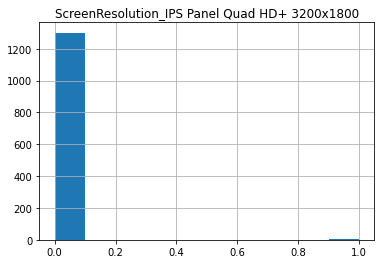

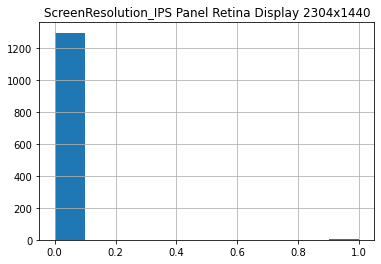

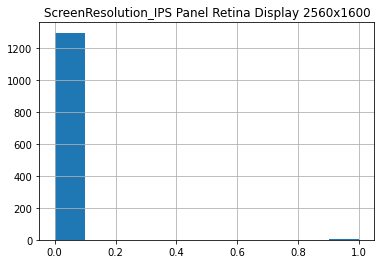

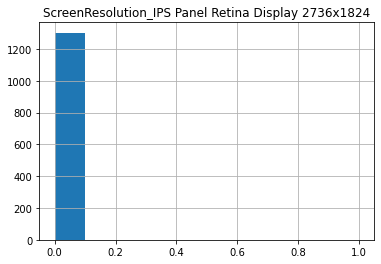

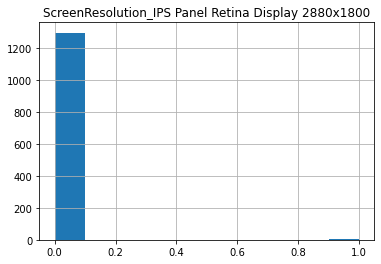

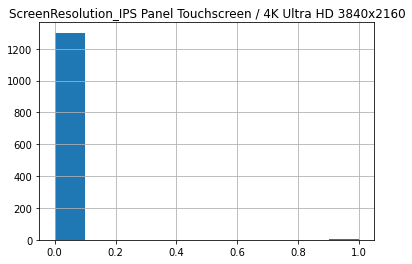

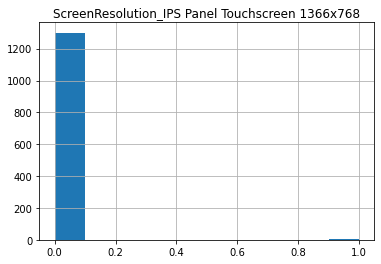

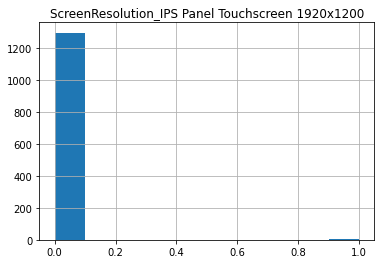

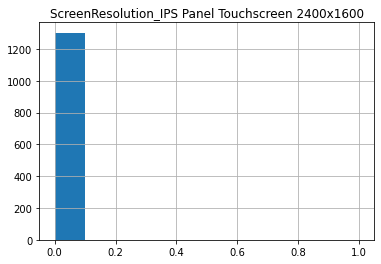

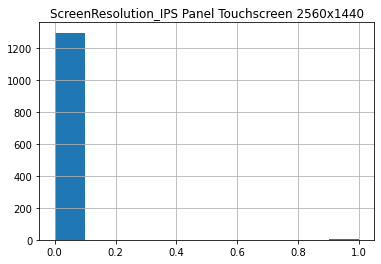

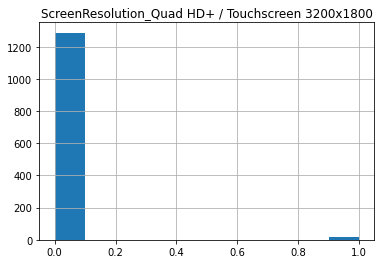

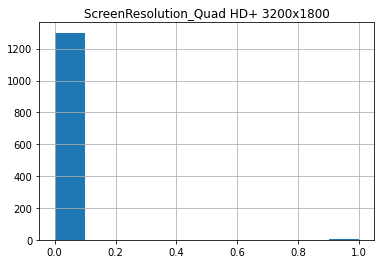

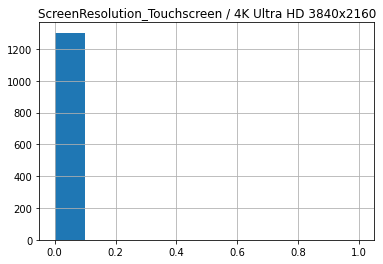

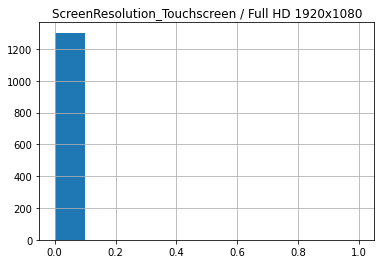

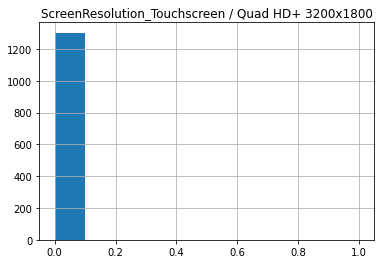

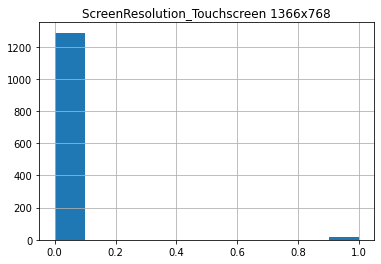

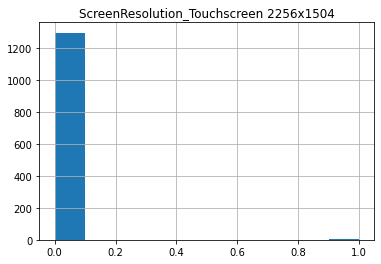

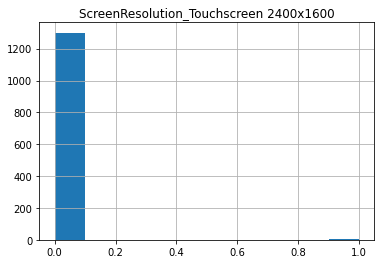

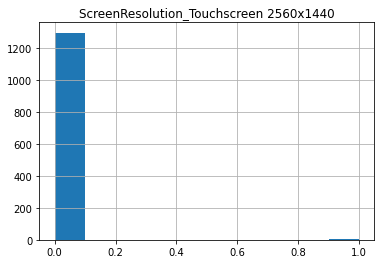

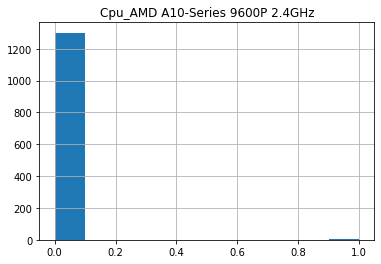

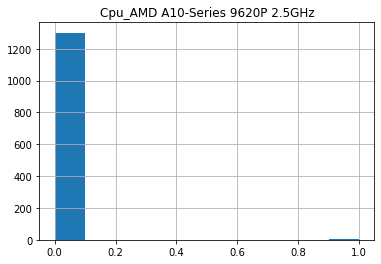

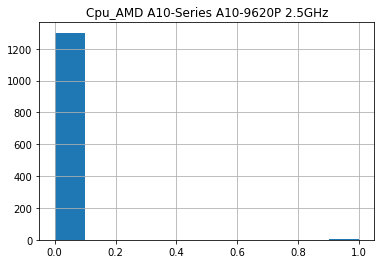

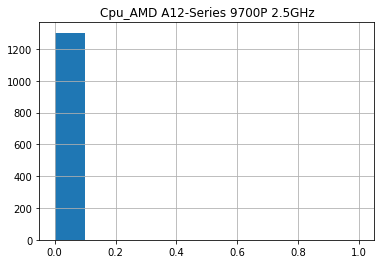

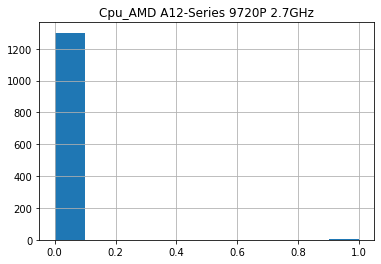

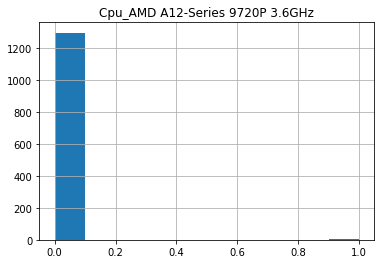

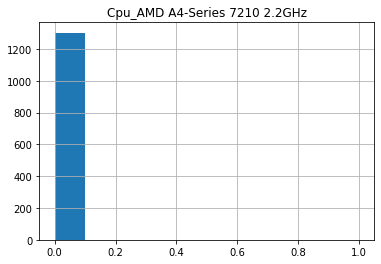

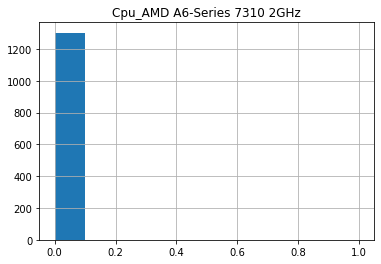

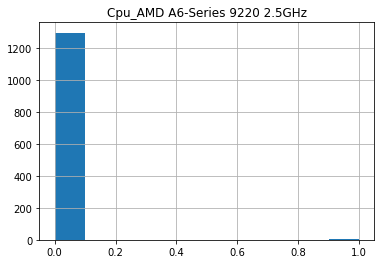

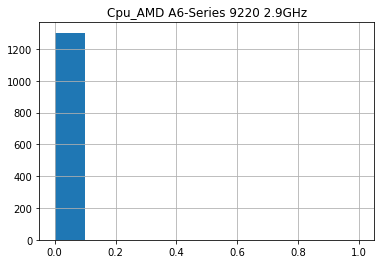

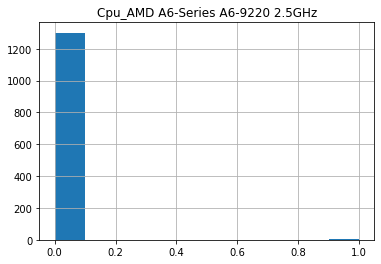

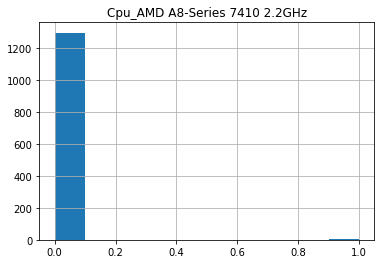

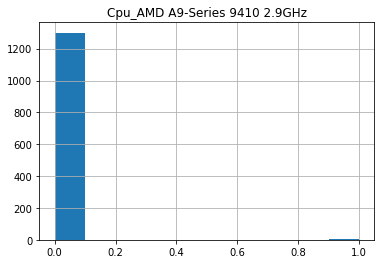

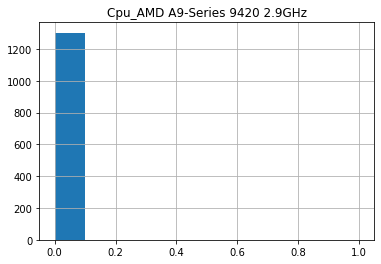

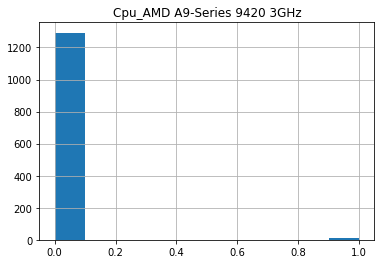

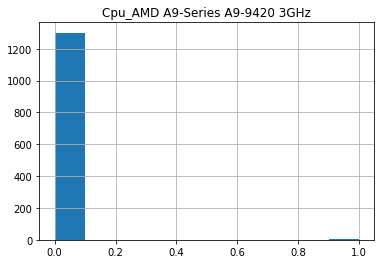

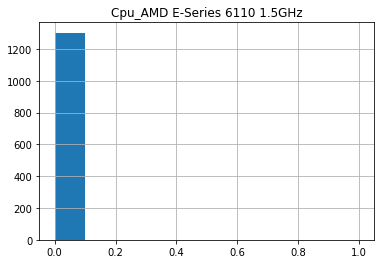

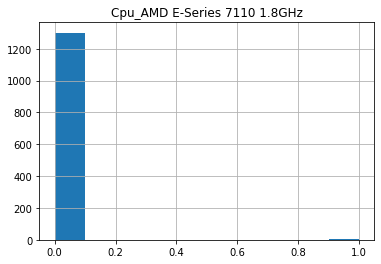

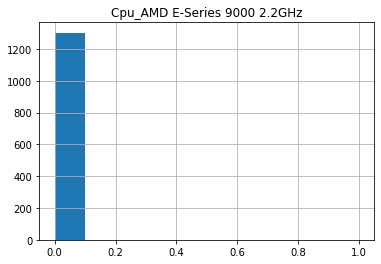

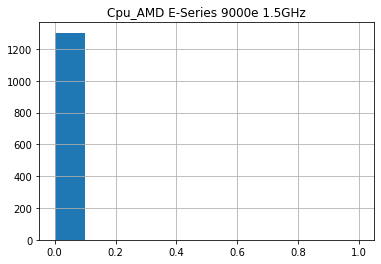

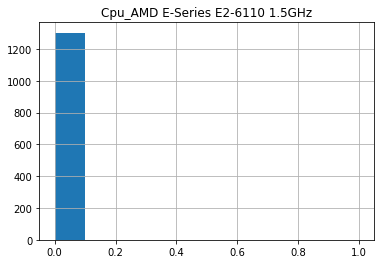

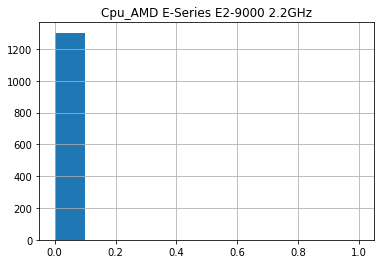

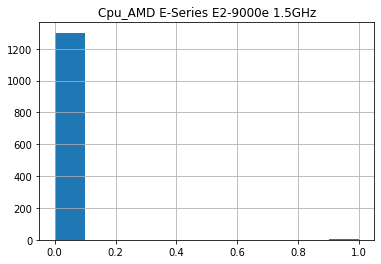

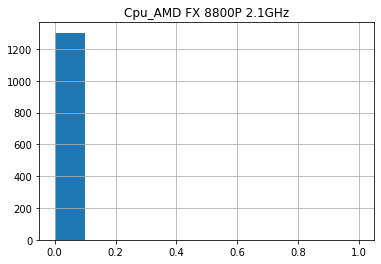

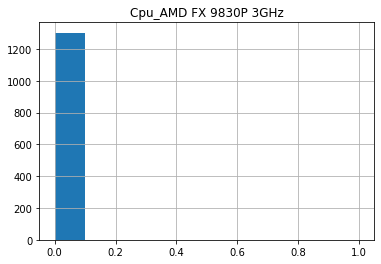

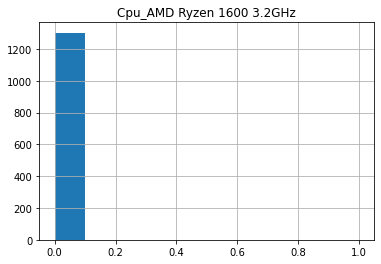

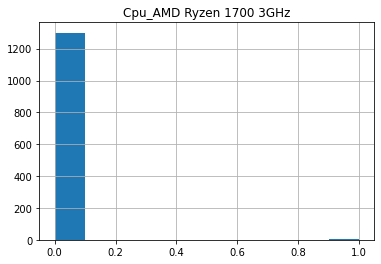

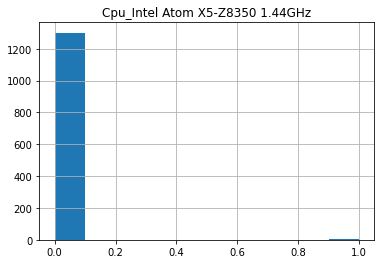

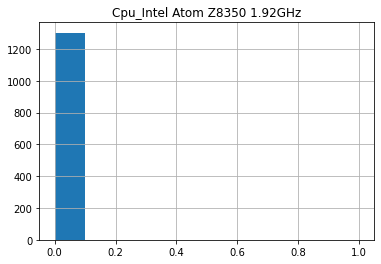

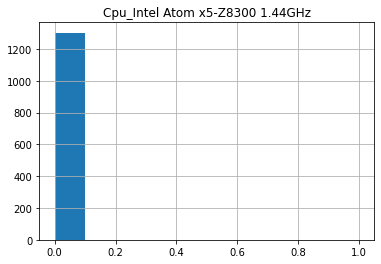

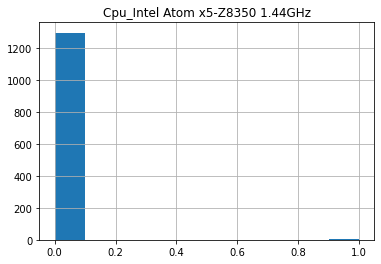

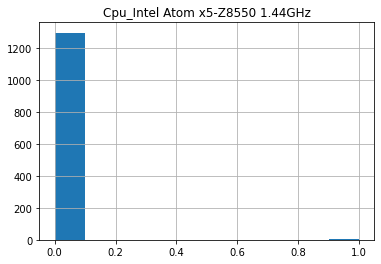

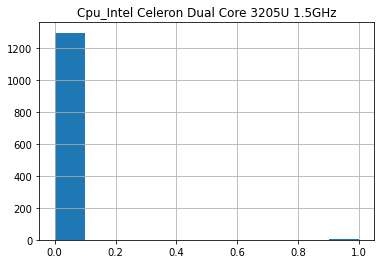

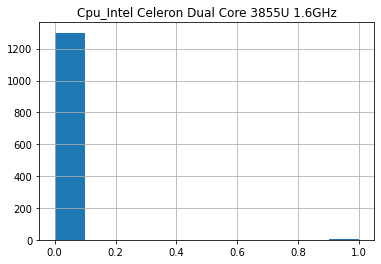

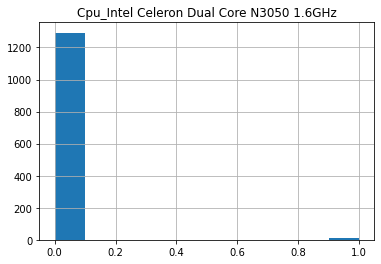

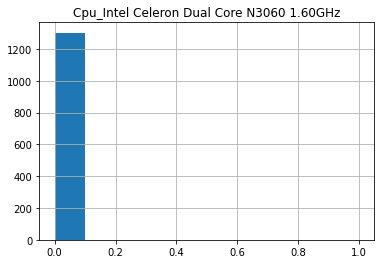

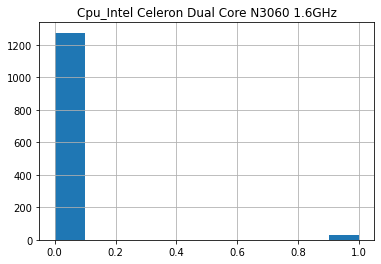

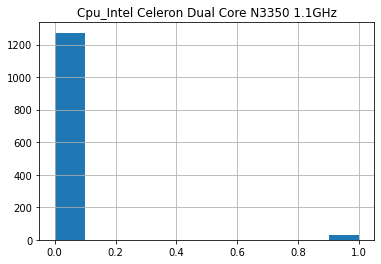

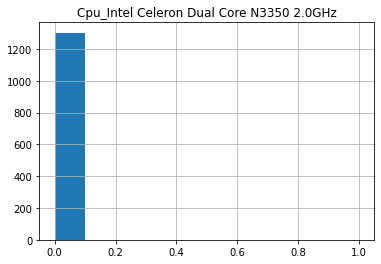

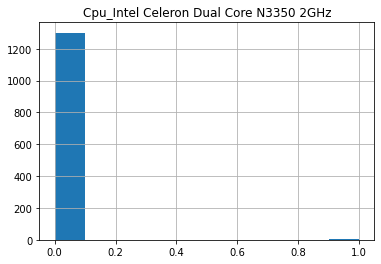

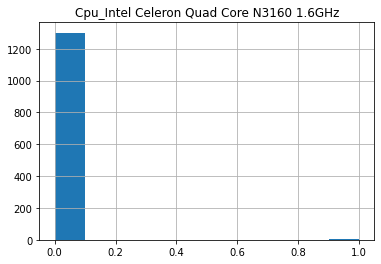

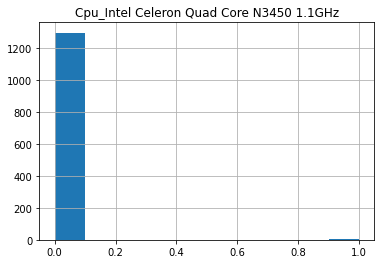

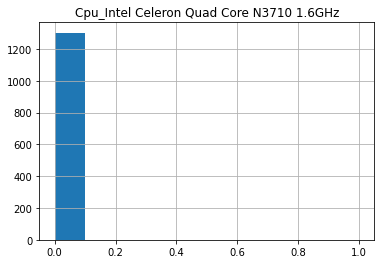

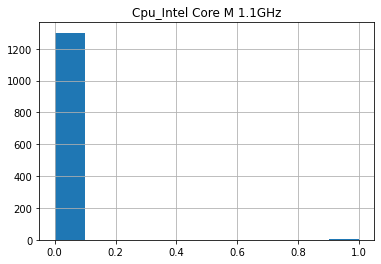

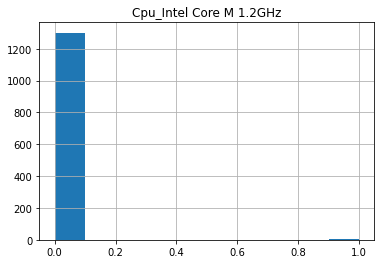

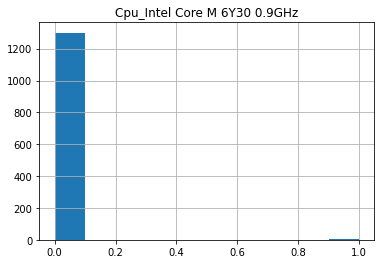

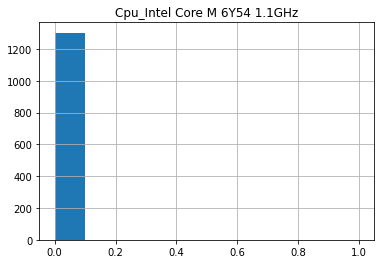

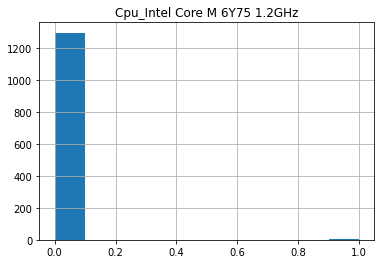

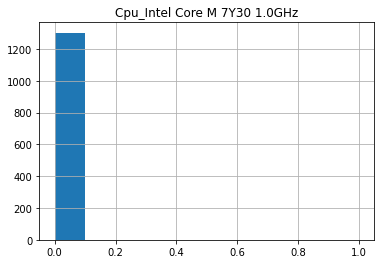

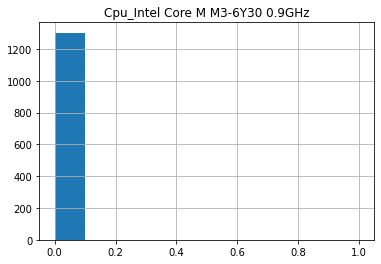

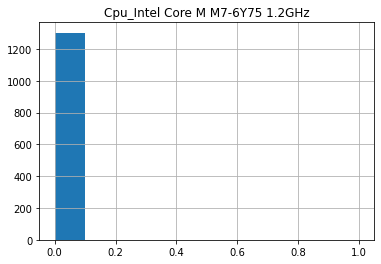

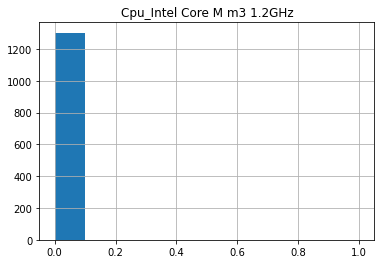

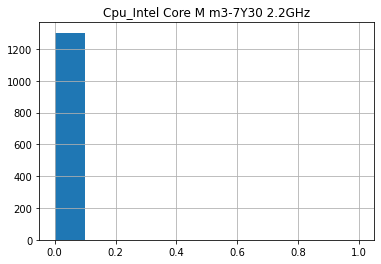

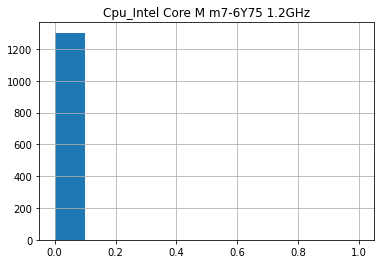

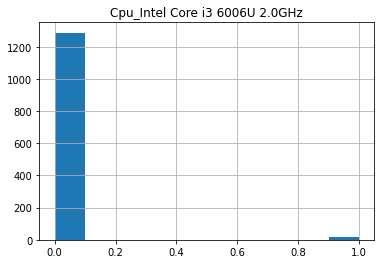

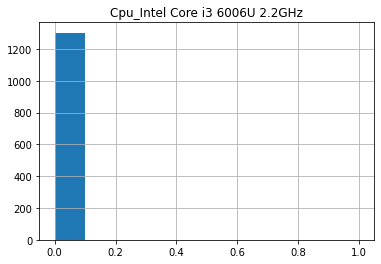

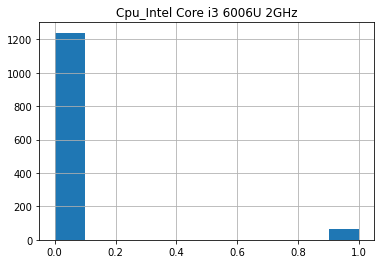

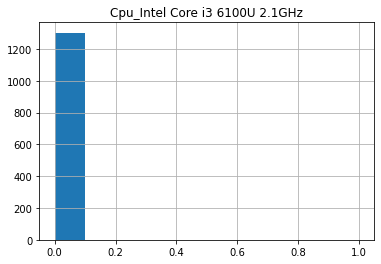

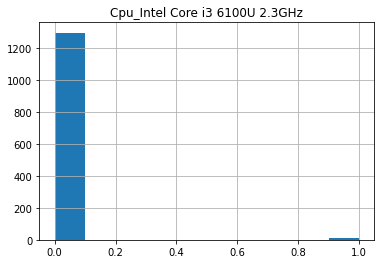

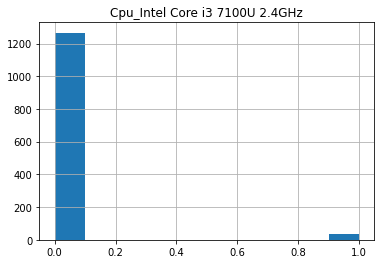

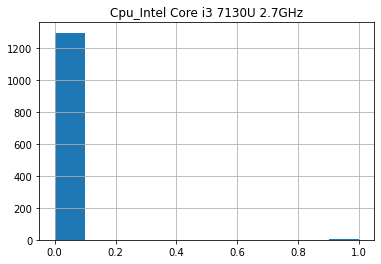

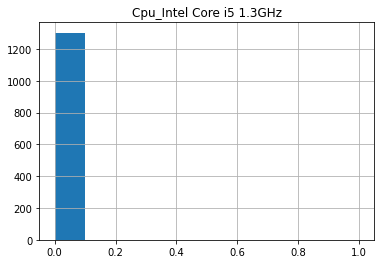

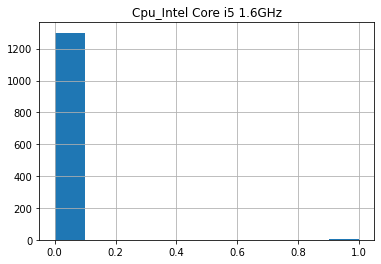

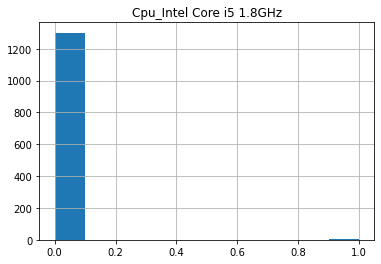

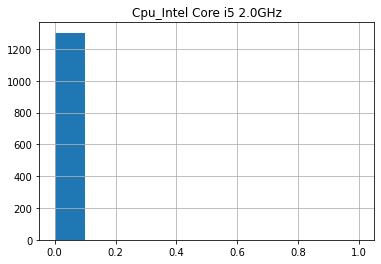

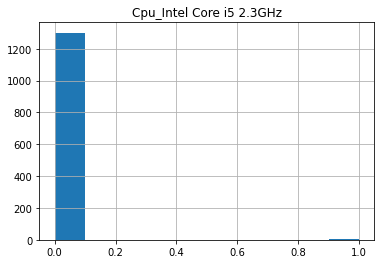

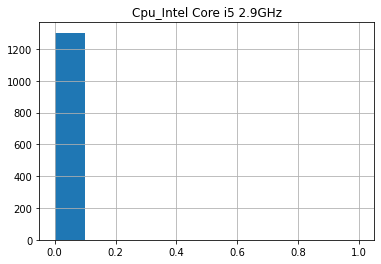

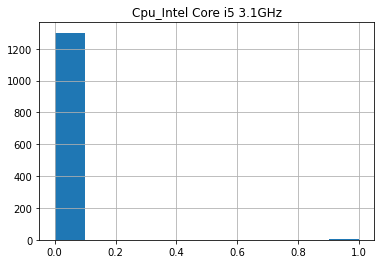

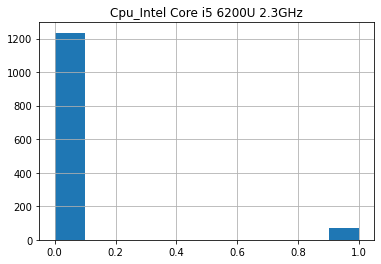

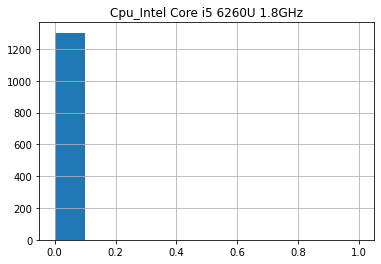

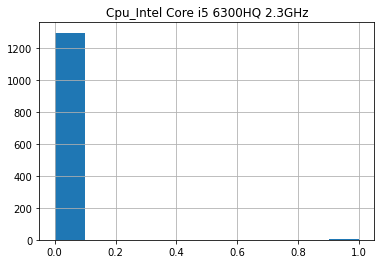

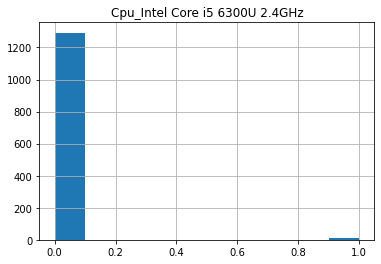

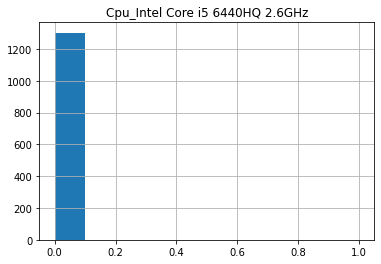

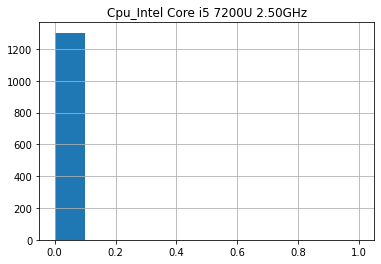

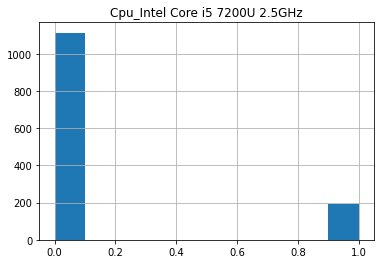

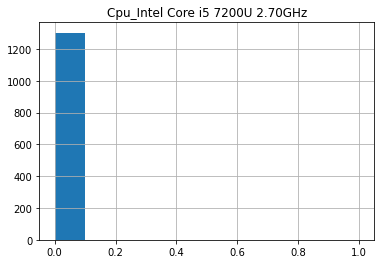

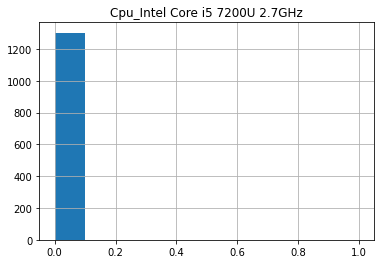

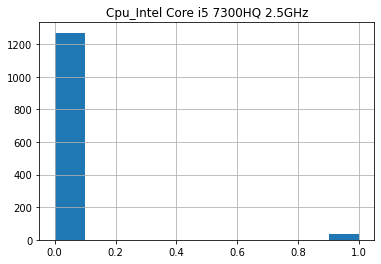

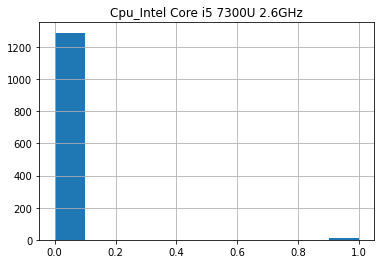

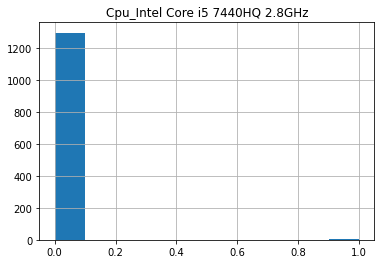

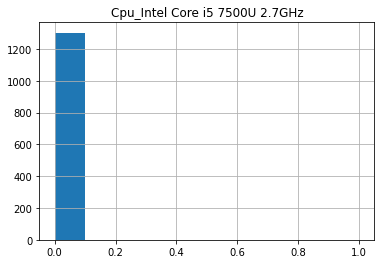

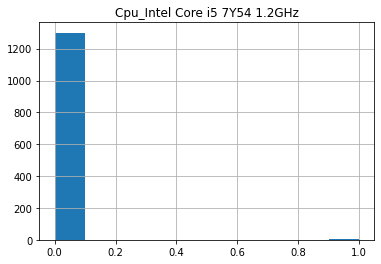

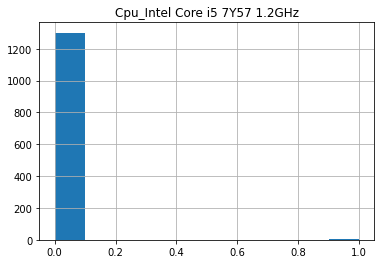

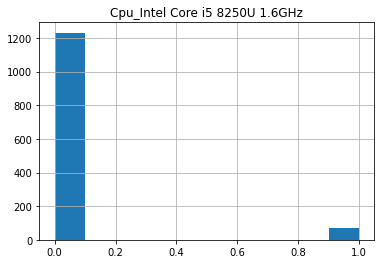

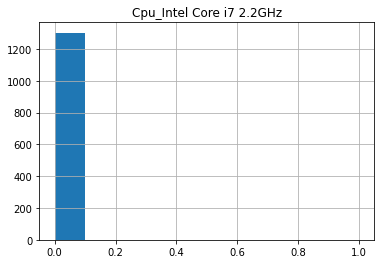

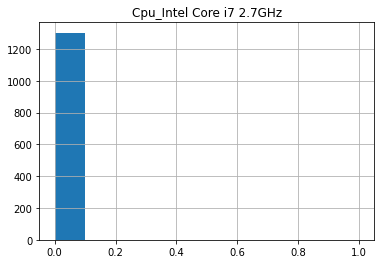

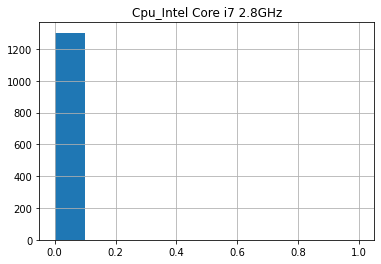

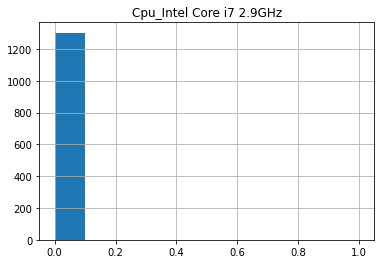

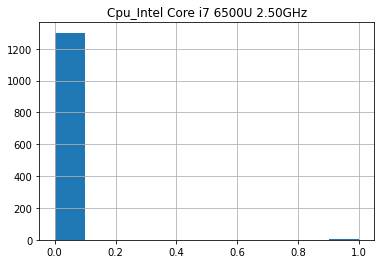

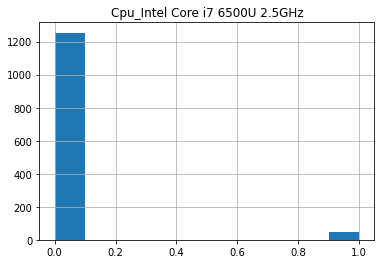

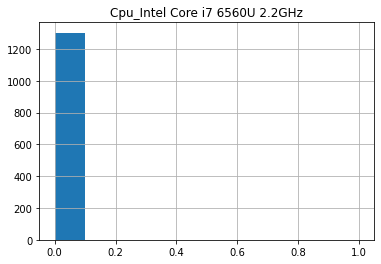

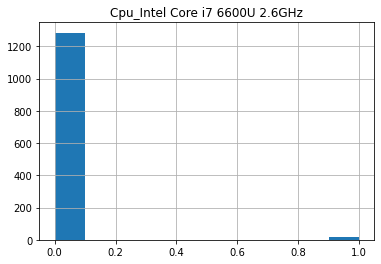

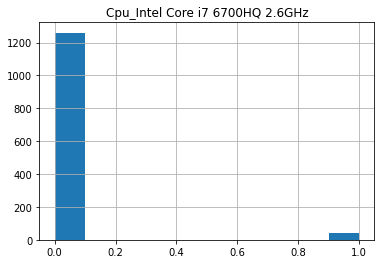

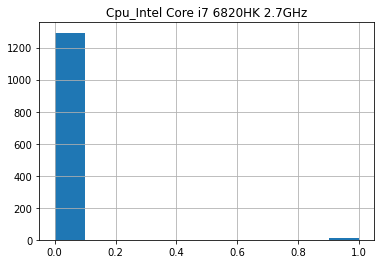

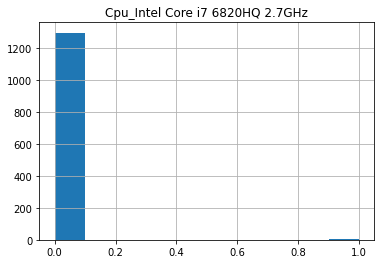

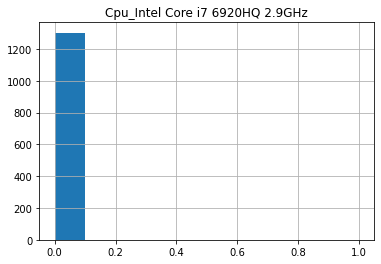

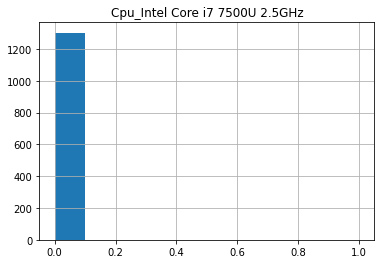

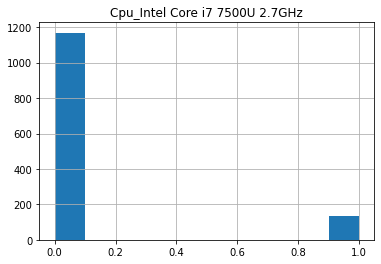

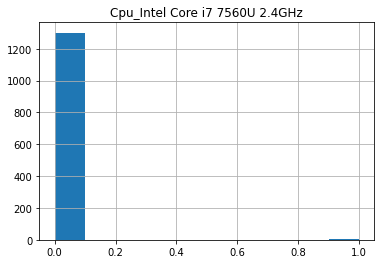

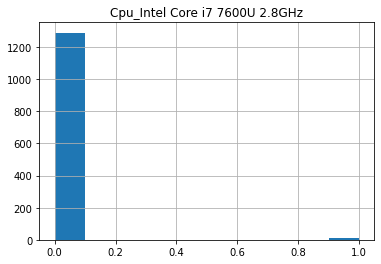

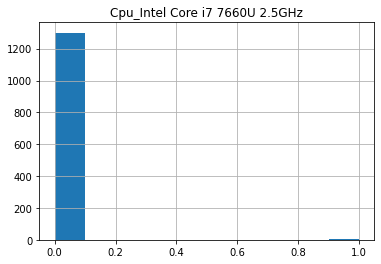

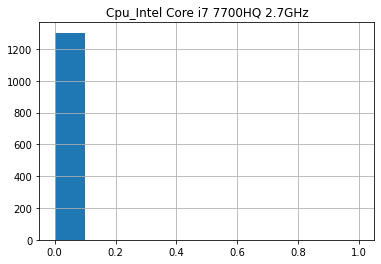

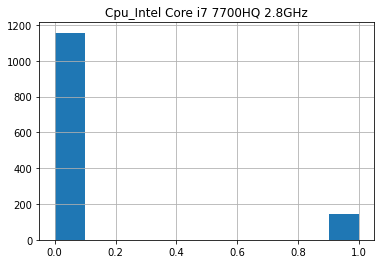

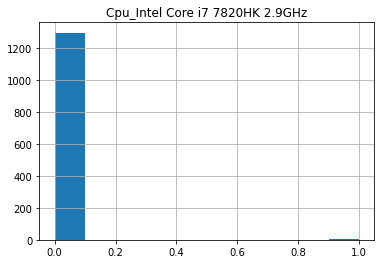

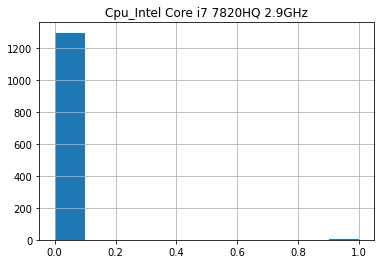

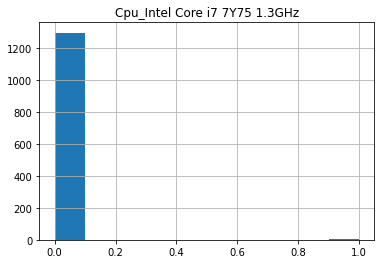

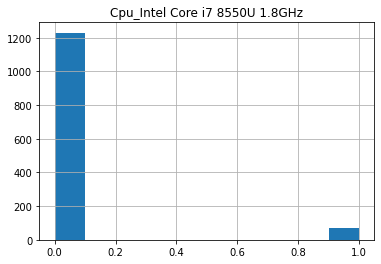

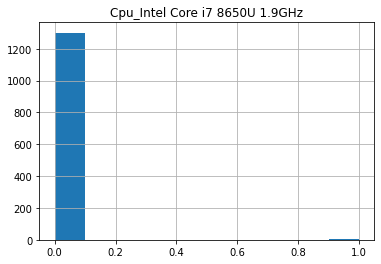

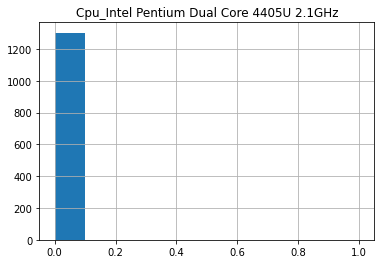

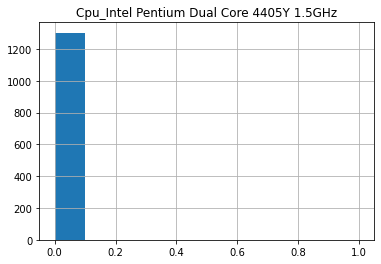

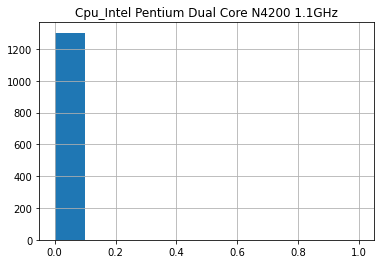

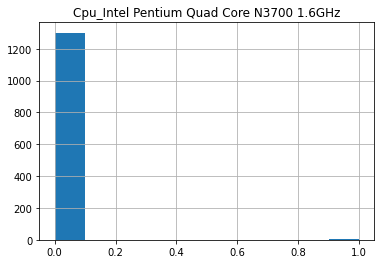

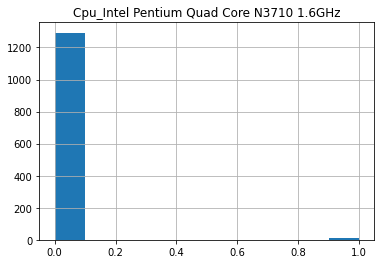

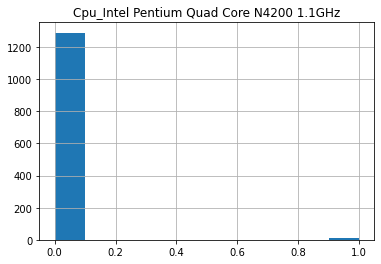

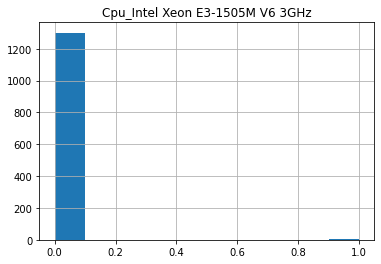

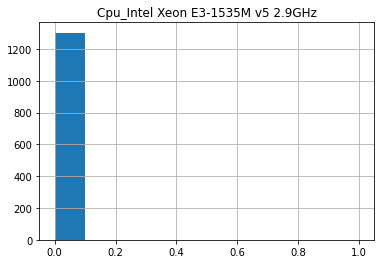

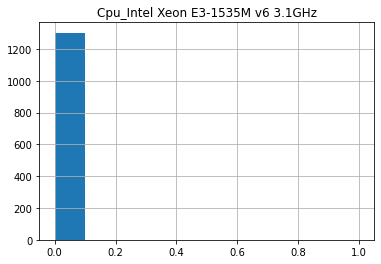

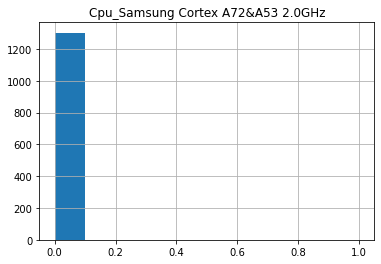

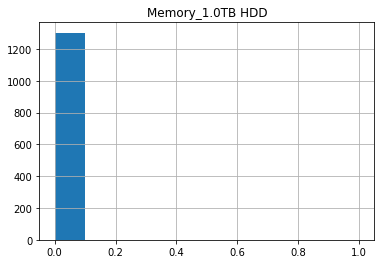

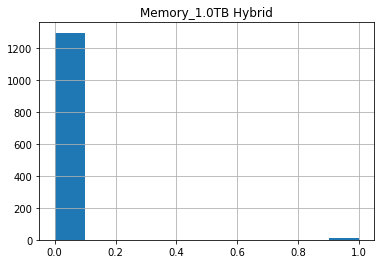

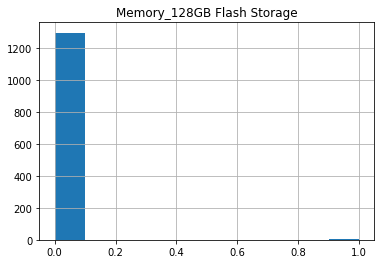

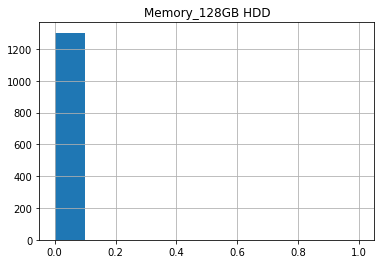

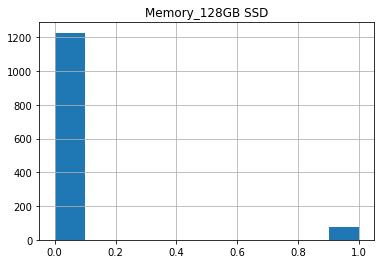

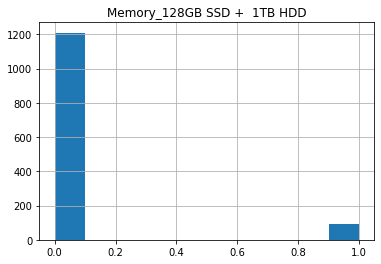

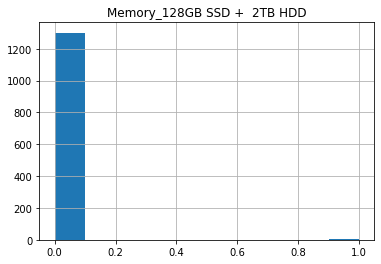

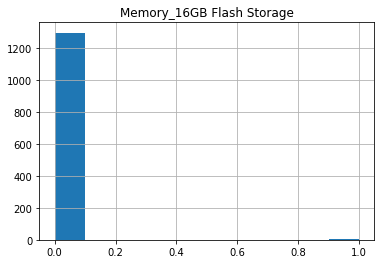

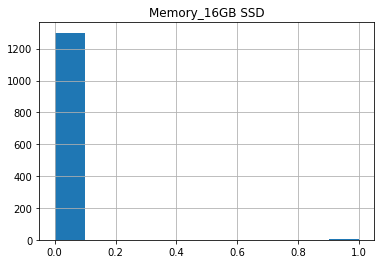

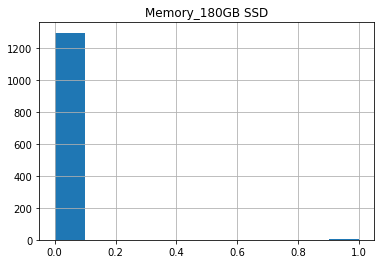

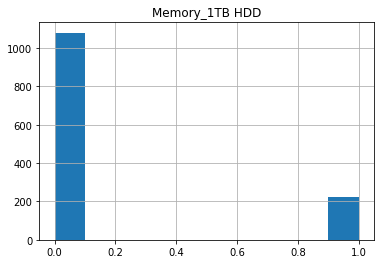

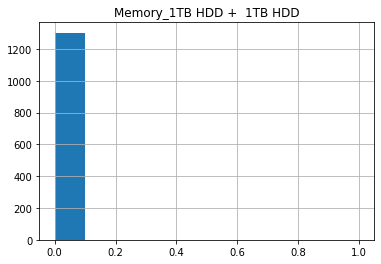

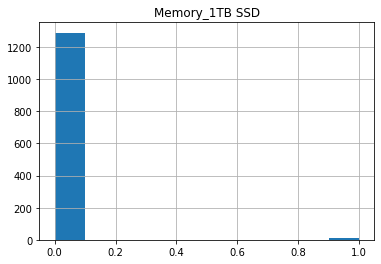

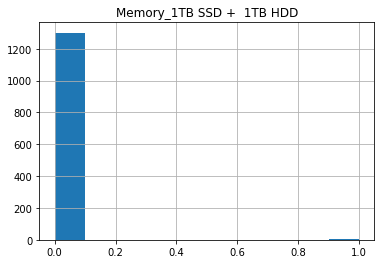

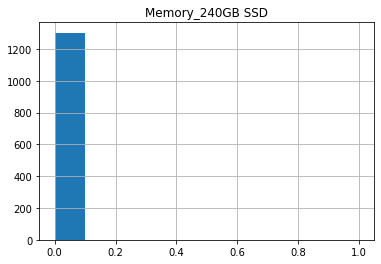

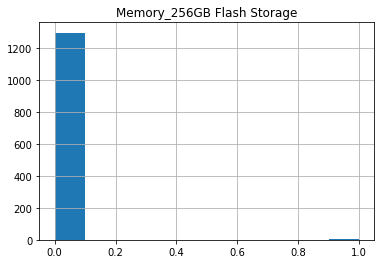

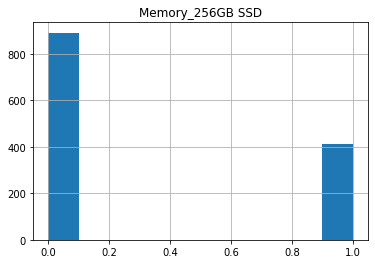

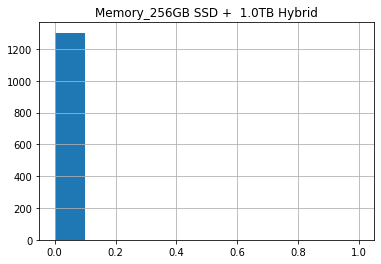

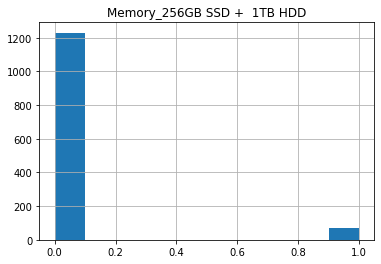

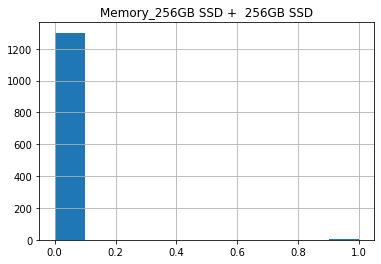

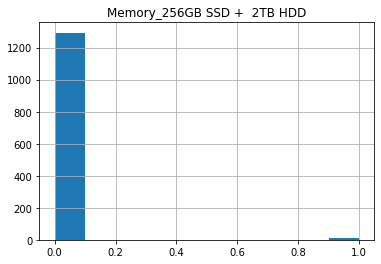

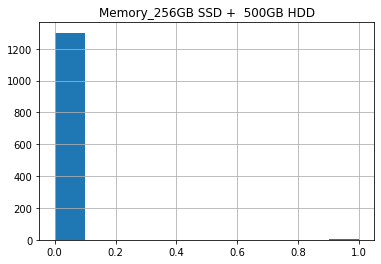

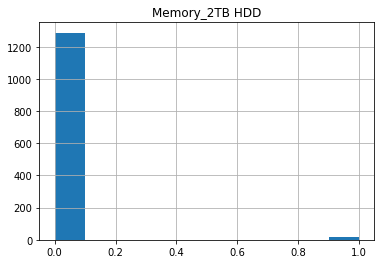

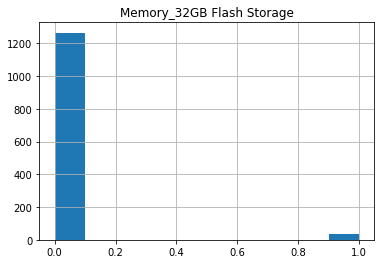

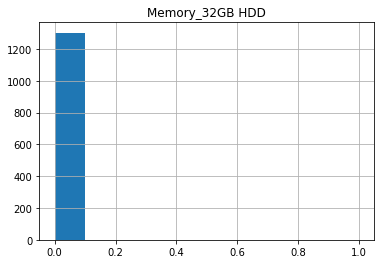

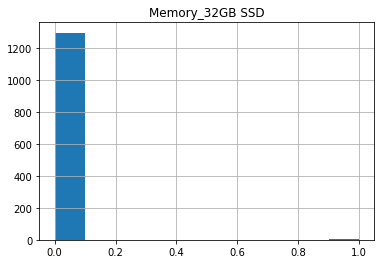

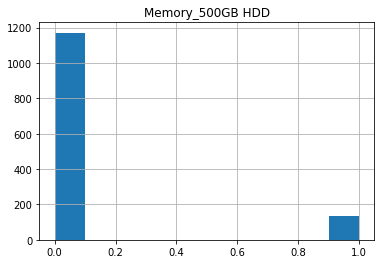

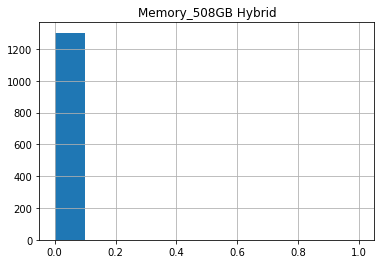

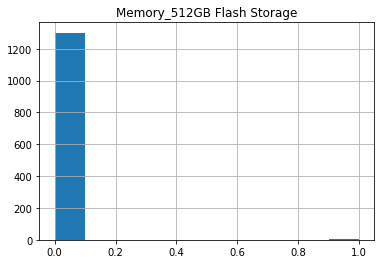

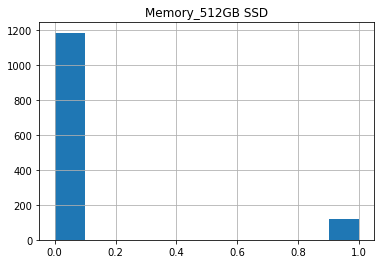

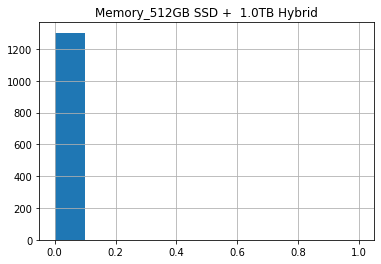

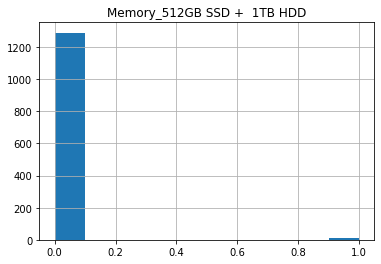

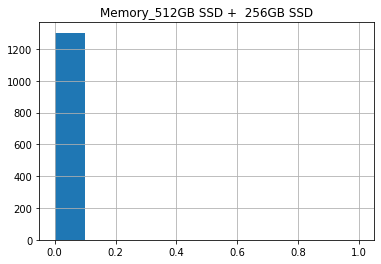

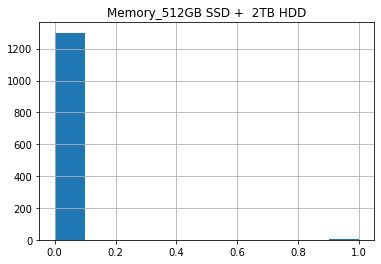

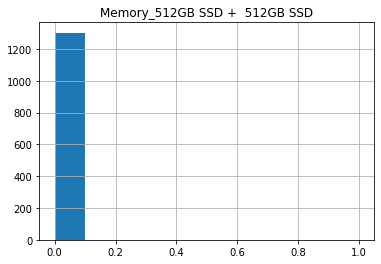

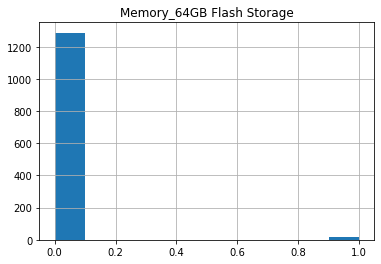

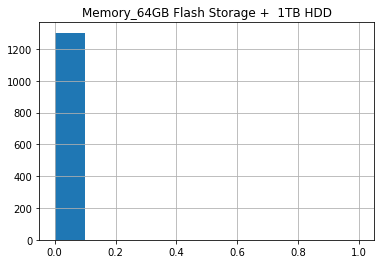

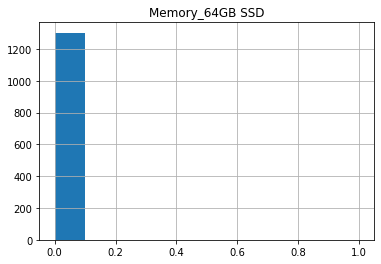

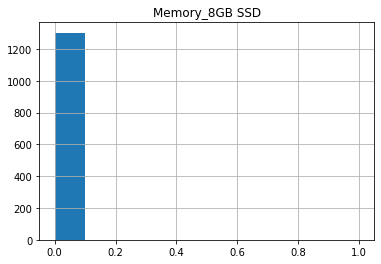

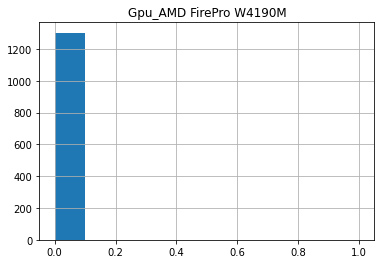

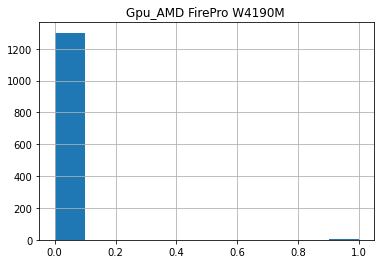

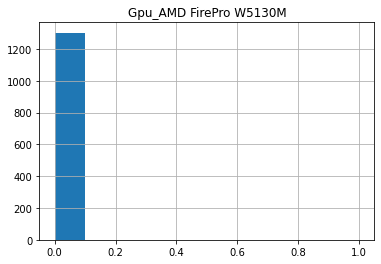

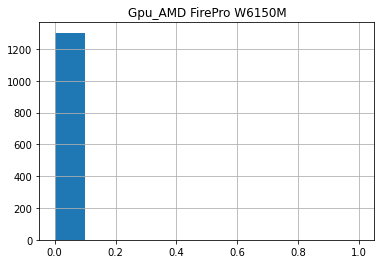

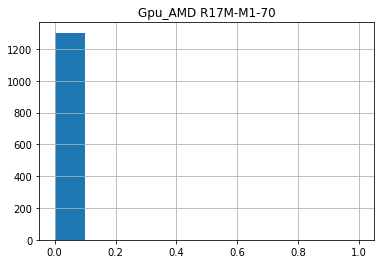

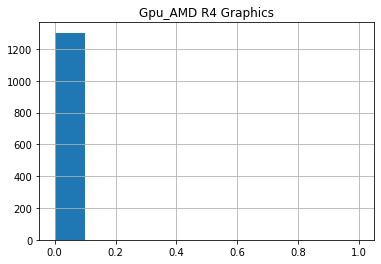

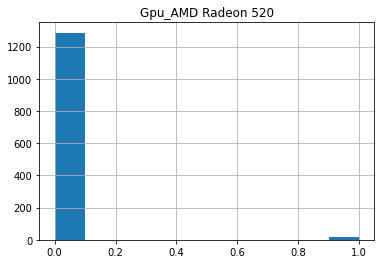

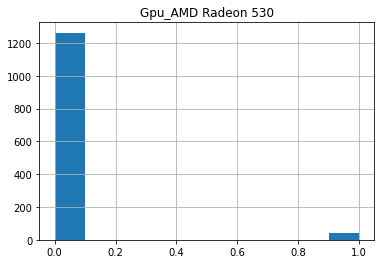

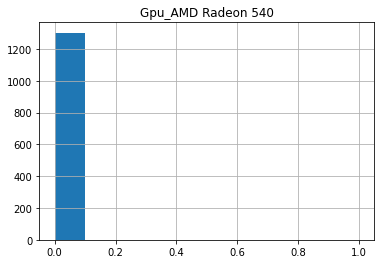

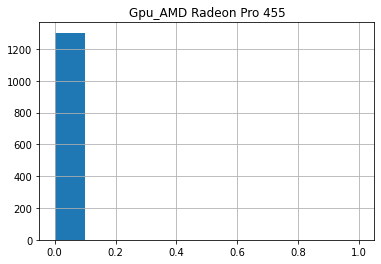

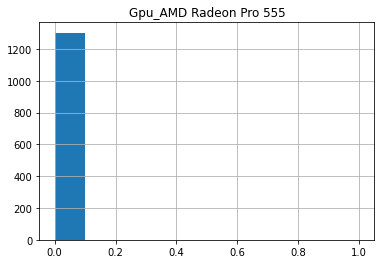

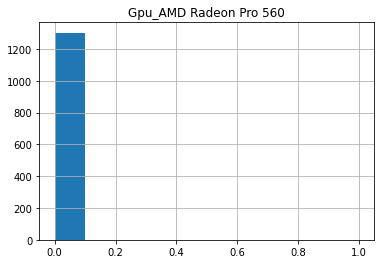

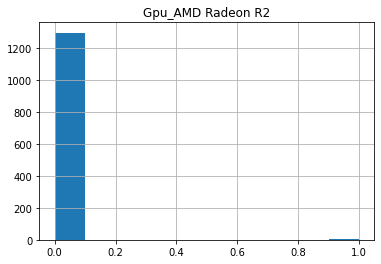

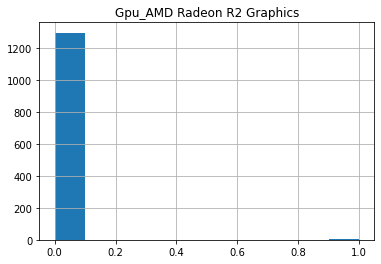

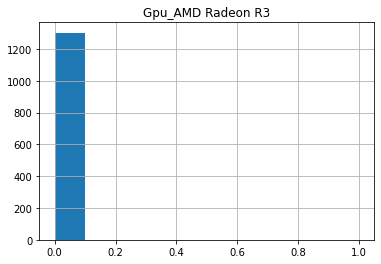

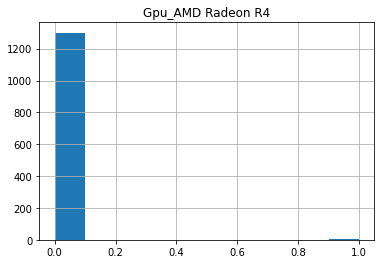

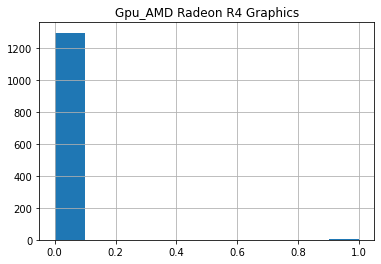

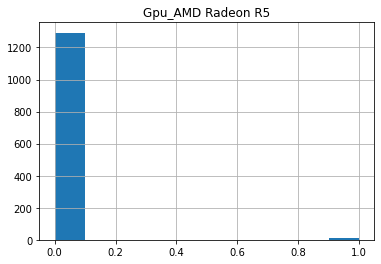

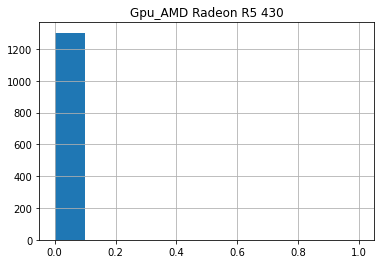

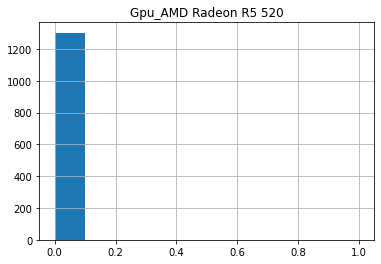

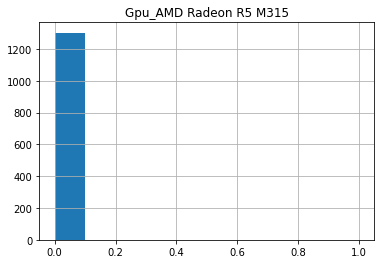

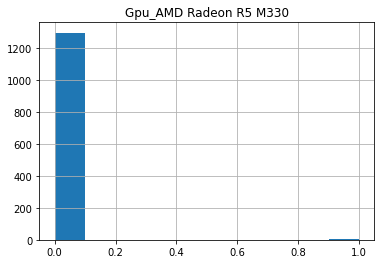

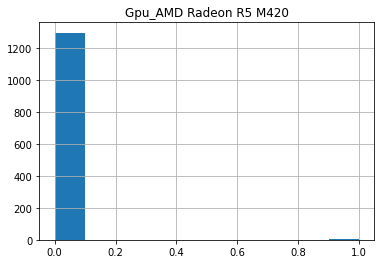

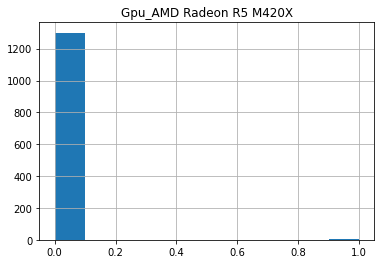

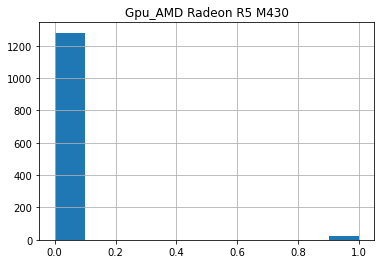

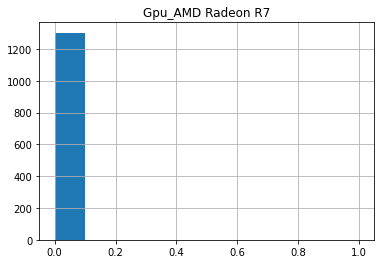

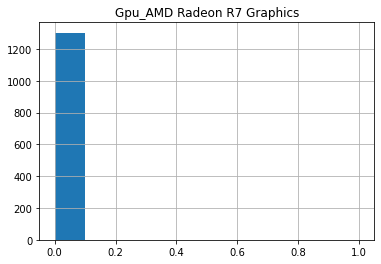

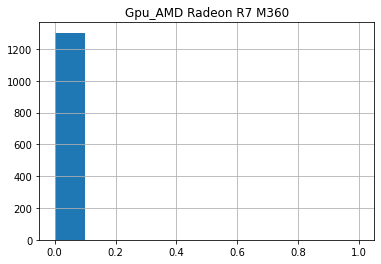

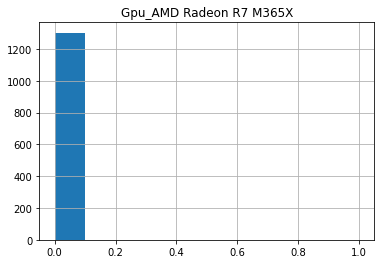

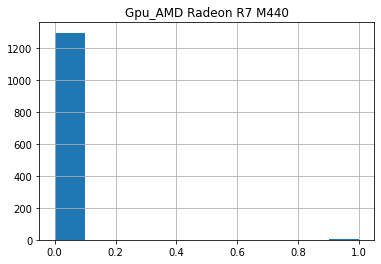

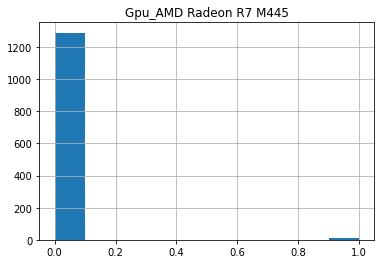

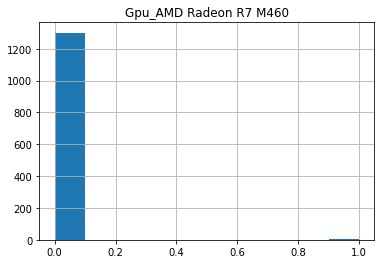

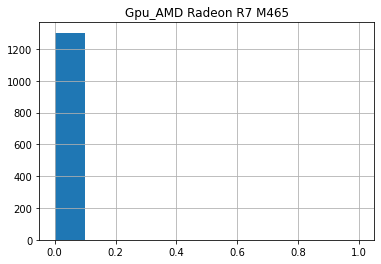

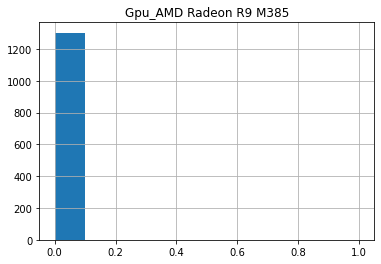

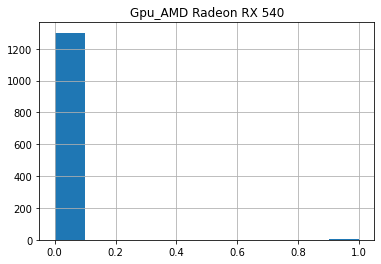

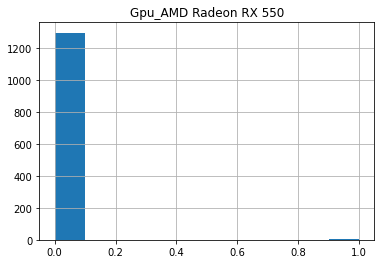

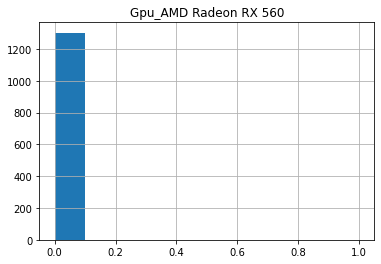

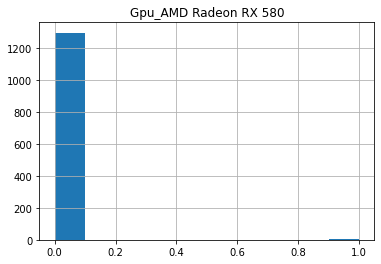

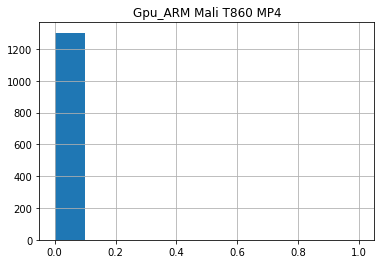

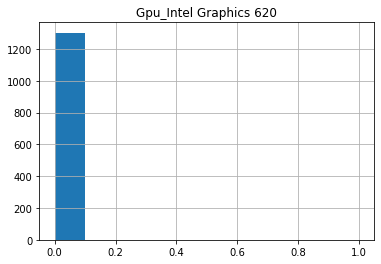

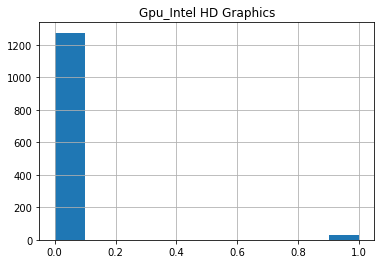

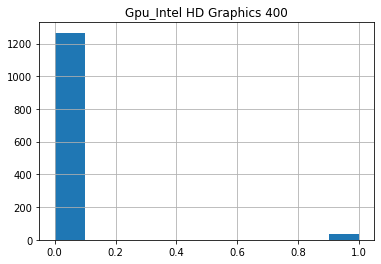

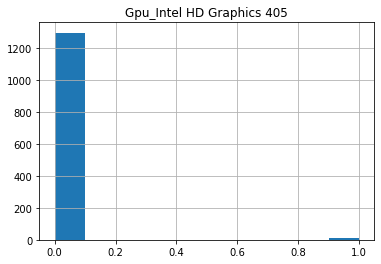

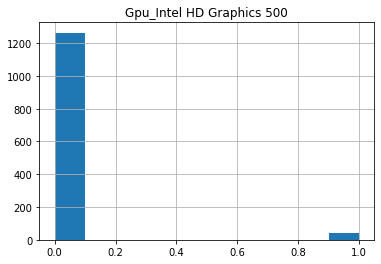

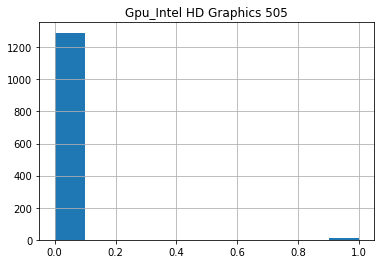

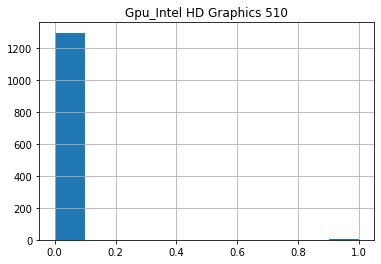

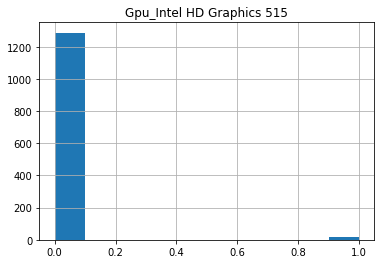

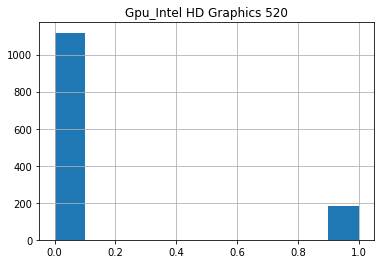

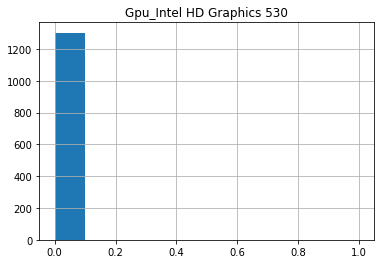

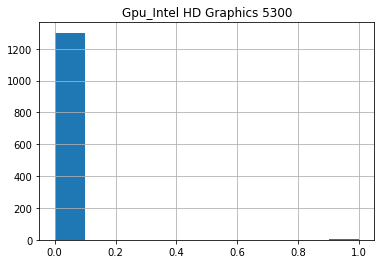

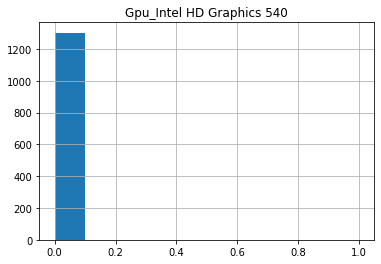

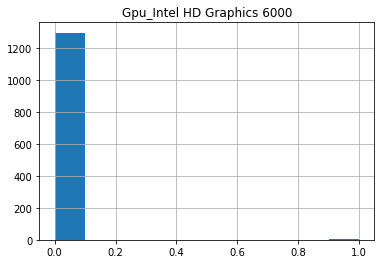

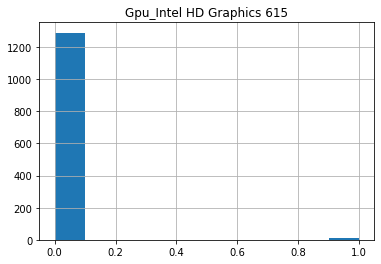

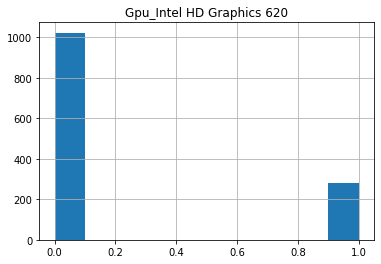

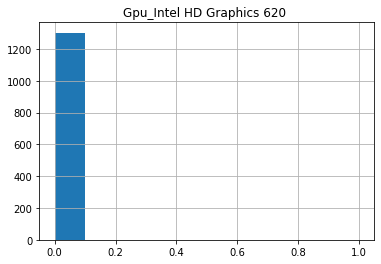

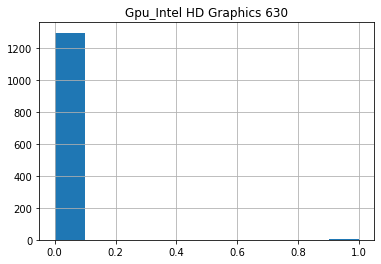

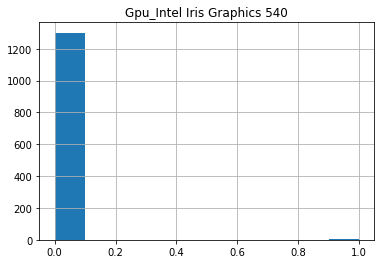

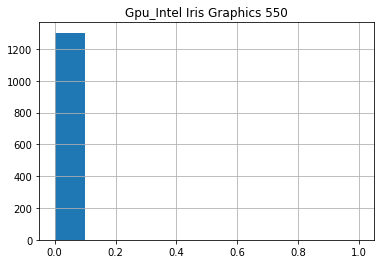

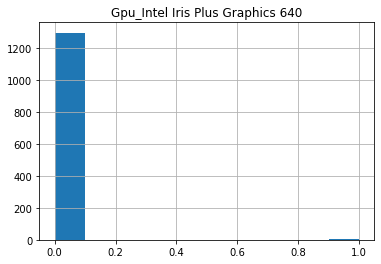

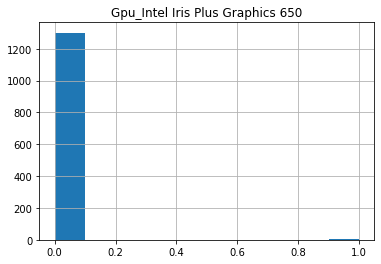

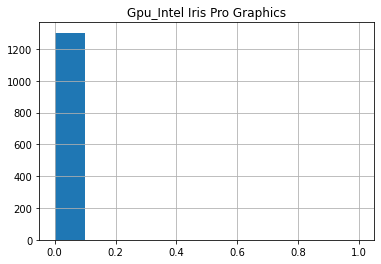

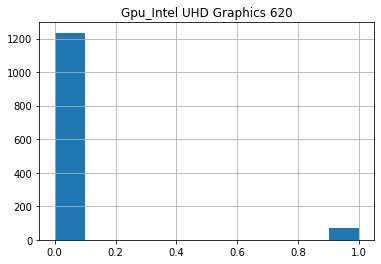

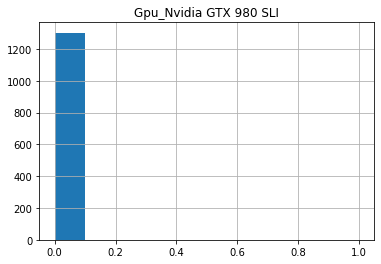

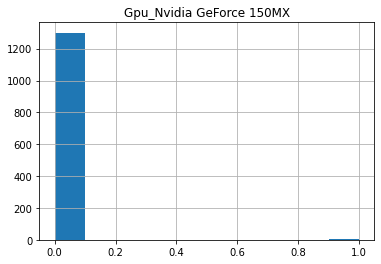

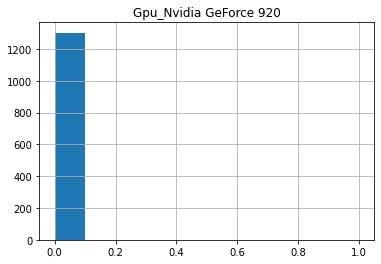

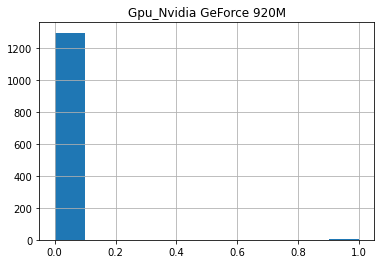

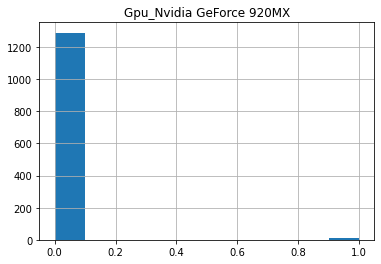

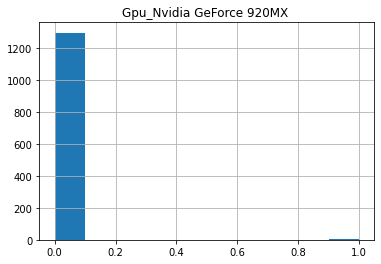

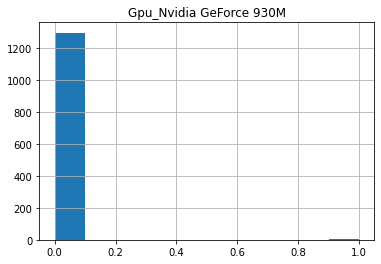

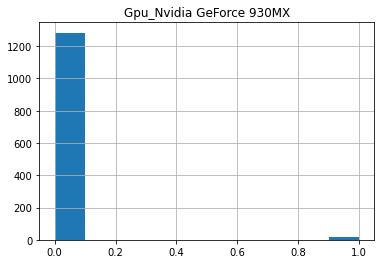

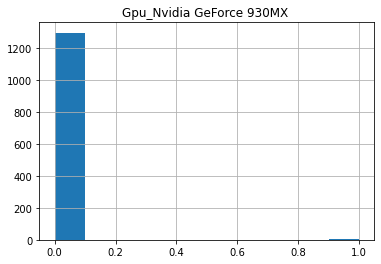

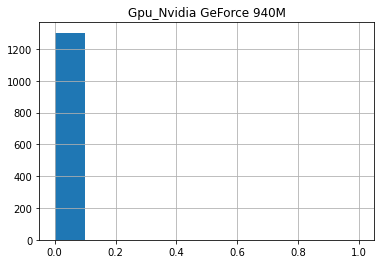

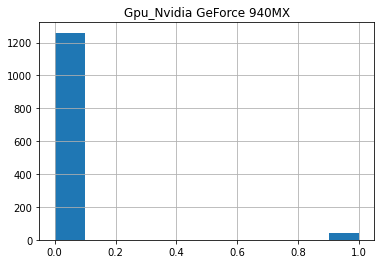

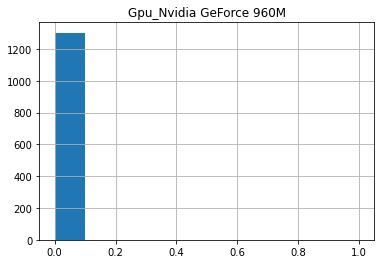

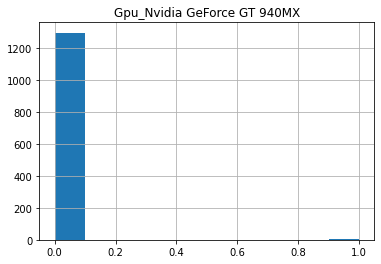

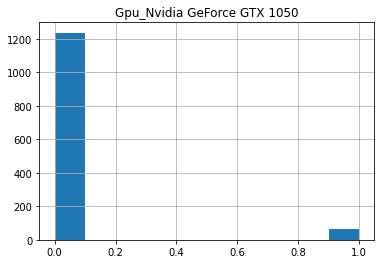

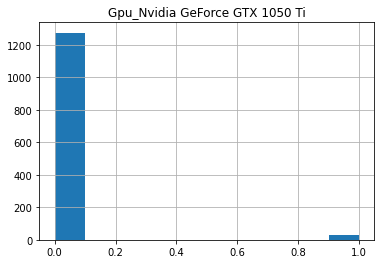

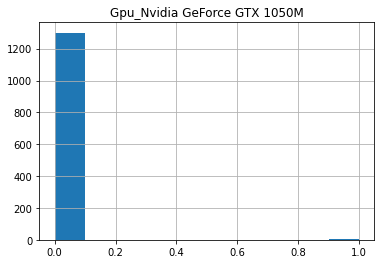

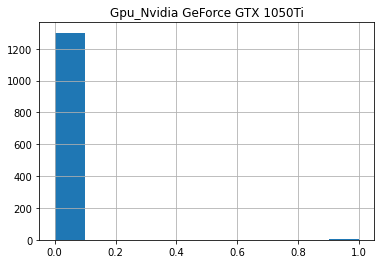

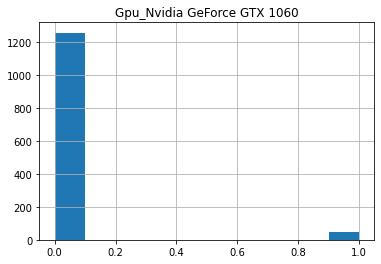

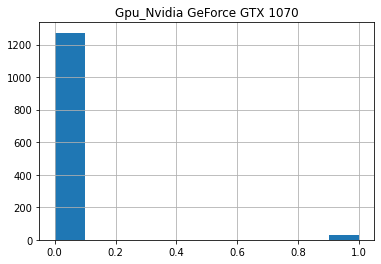

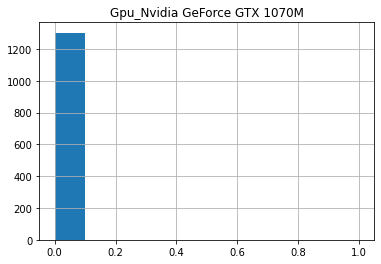

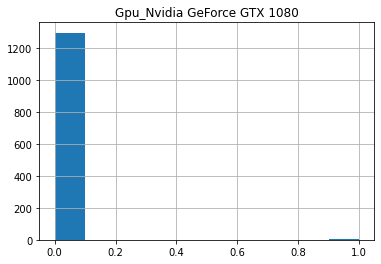

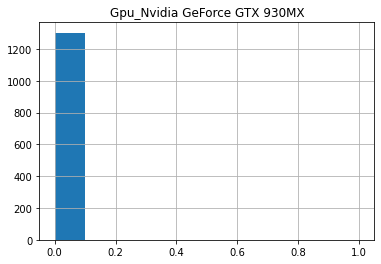

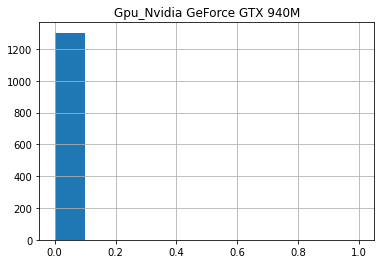

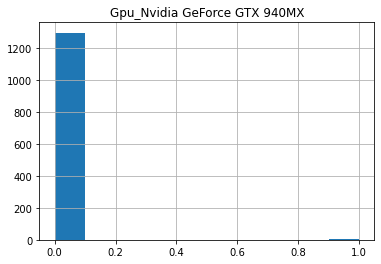

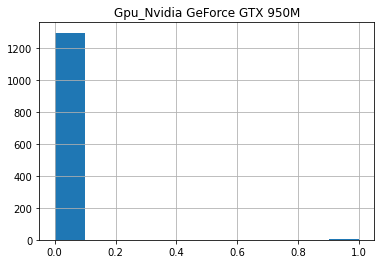

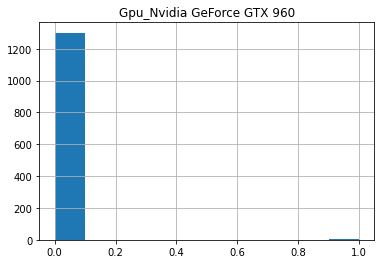

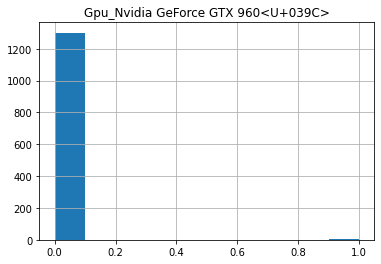

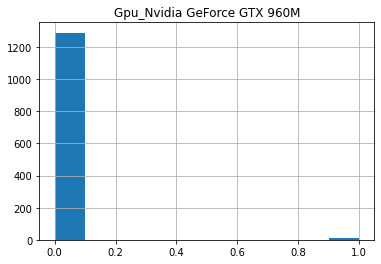

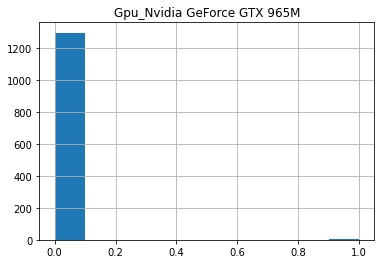

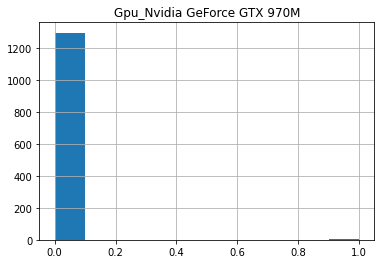

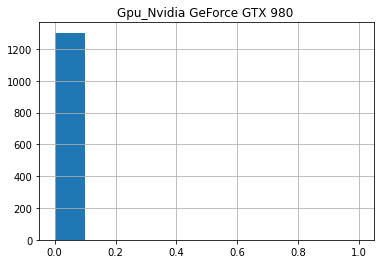

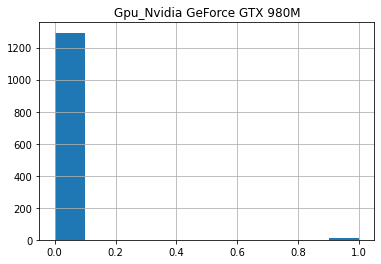

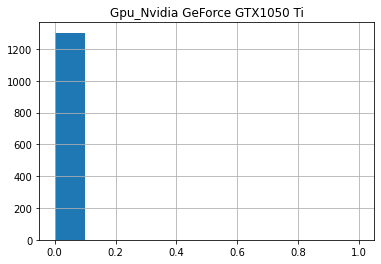

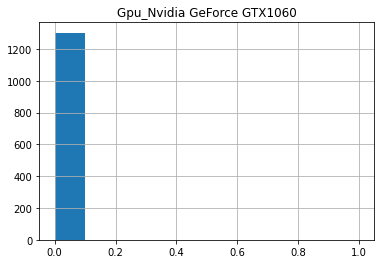

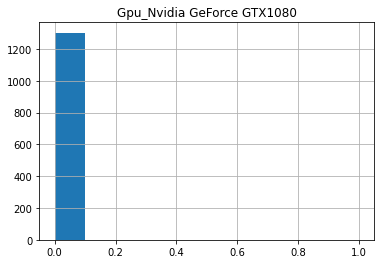

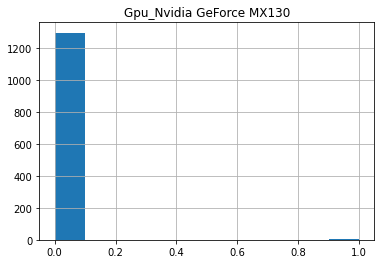

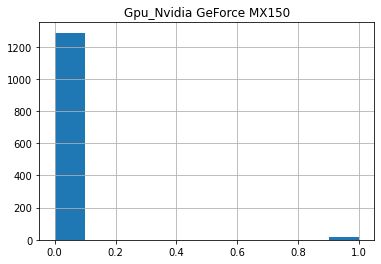

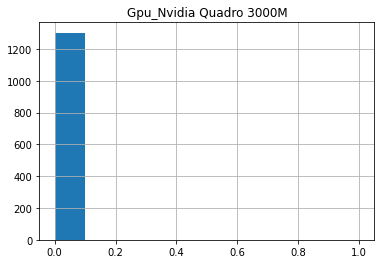

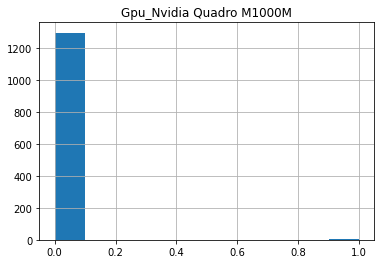

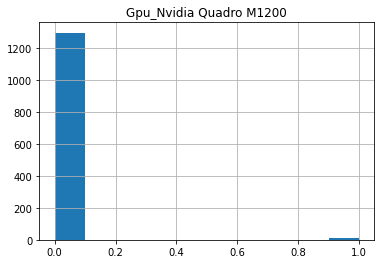

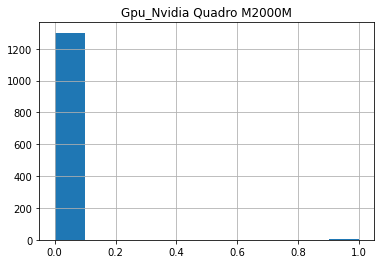

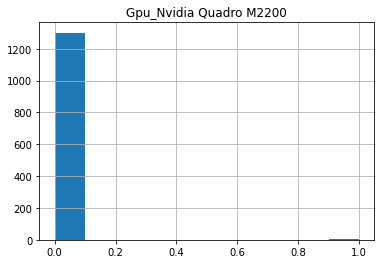

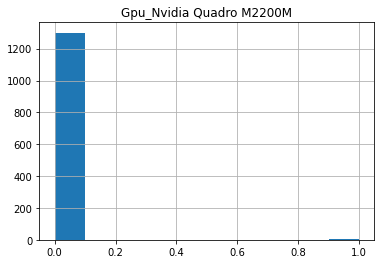

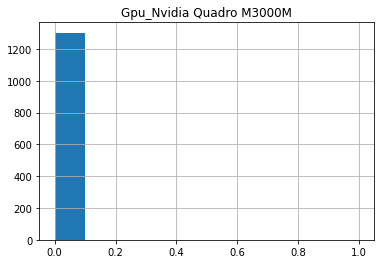

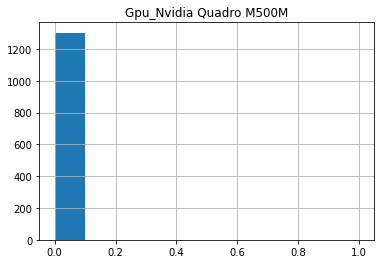

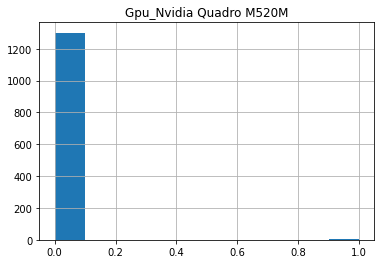

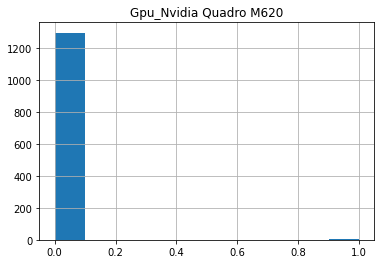

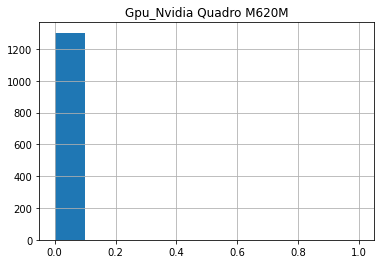

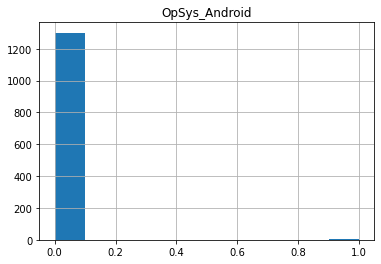

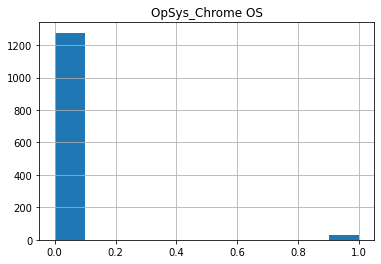

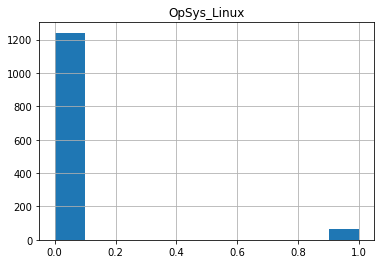

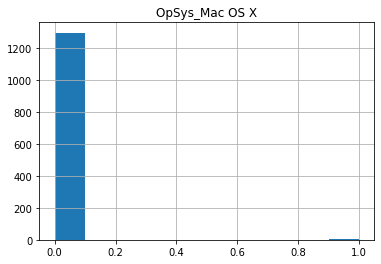

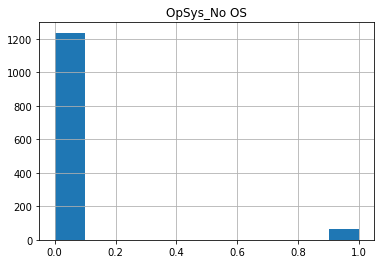

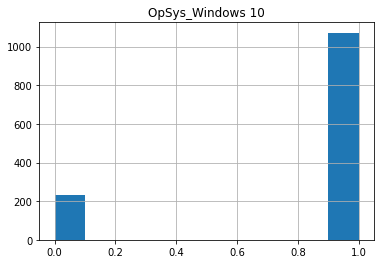

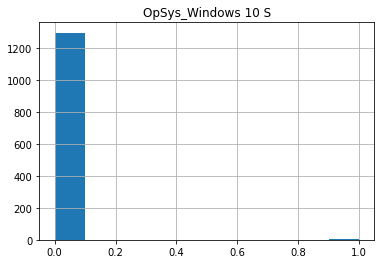

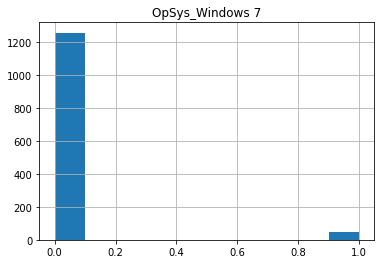

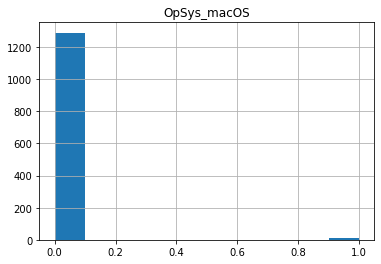

In [11]:
for col in data_final.columns:
  #print(col)
  data_final.hist(column=col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_euros  1303 non-null   float64
 1   Ram          1303 non-null   int64  
 2   Weight       1303 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.7 KB


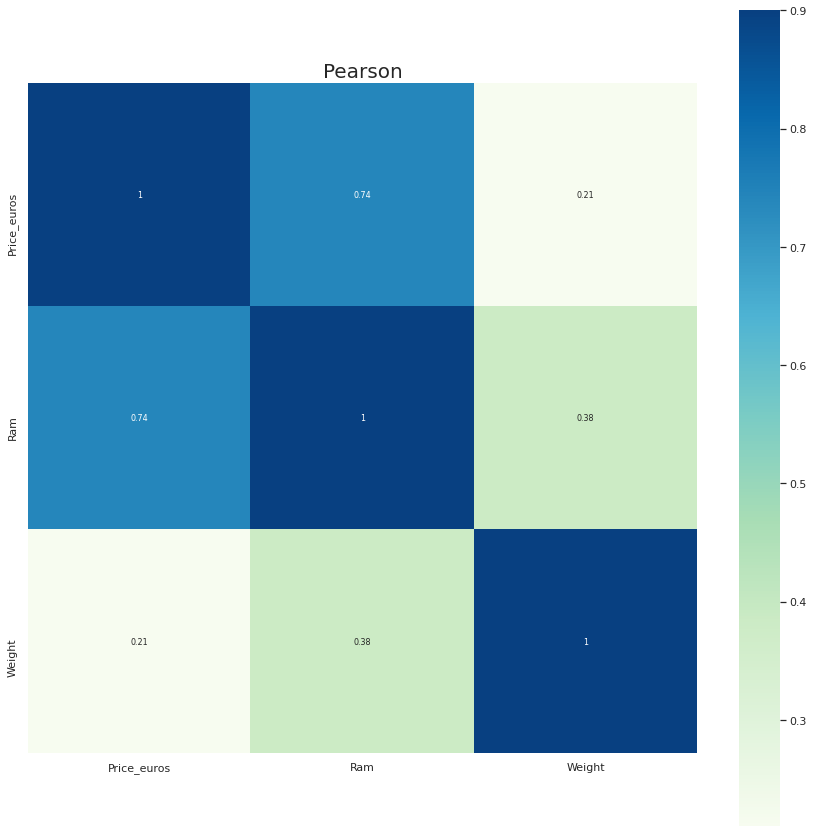

In [12]:
data_x  = data_final[['Price_euros','Ram','Weight']]
'''
Price_euros                           1303 non-null   float64
 2   Ram_12GB                              1303 non-null   uint8  
 3   Ram_16GB                              1303 non-null   uint8  
 4   Ram_24GB                              1303 non-null   uint8  
 5   Ram_2GB                               1303 non-null   uint8  
 6   Ram_32GB                              1303 non-null   uint8  
 7   Ram_4GB                               1303 non-null   uint8  
 8   Ram_64GB                              1303 non-null   uint8  
 9   Ram_6GB                               1303 non-null   uint8  
 10  Ram_8GB   
 '''
data_x.info()
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_x.corr(),vmax=0.9,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

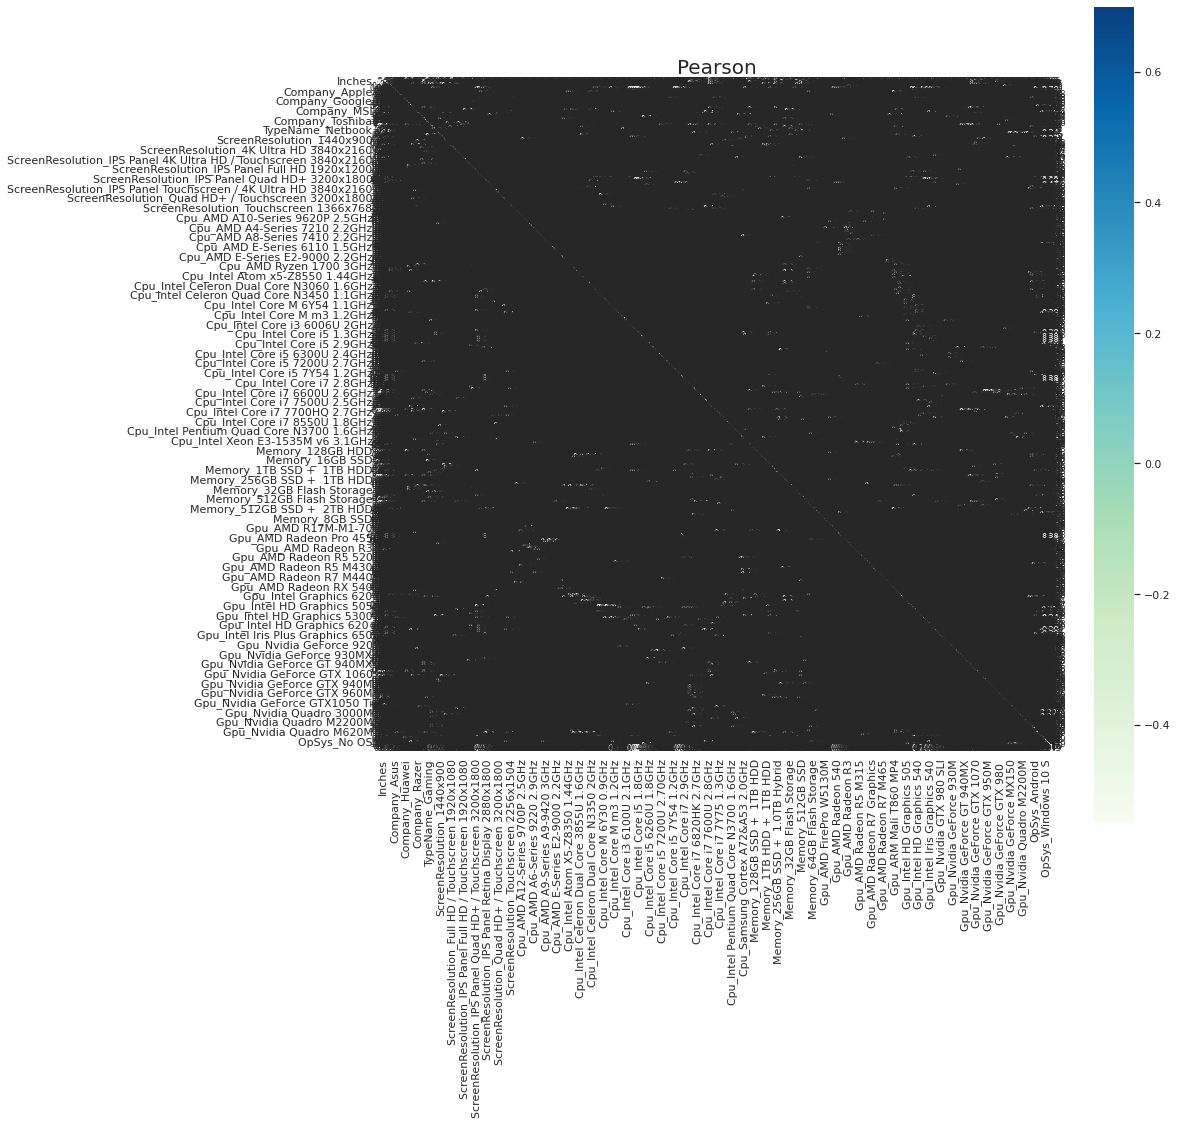

In [13]:
## PEARSON
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_final.corr(),vmax=0.7,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


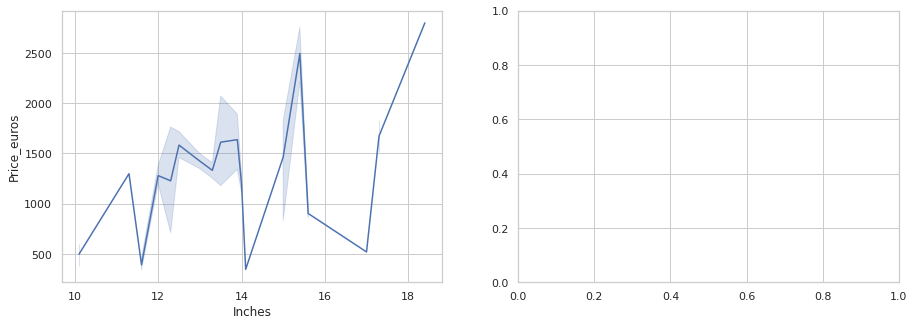

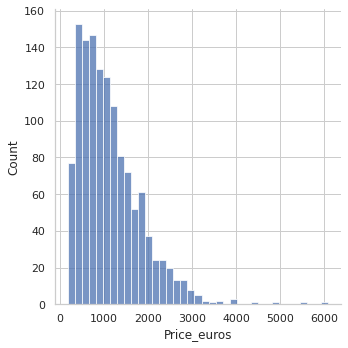

In [14]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(data_final['Price_euros'],ax=axes[1])
sns.lineplot(x='Inches',y='Price_euros',data=data_final,ax=axes[0])

In [15]:
## Asignamos a la variable "X" la data para crear nuestro modelo, quitado la variable objetivo
X = data_final.drop(['Price_euros'],axis=1)
print("Valores de X ","\n",X)
## Asignamos a y la variable objetivo
y = data_final['Price_euros']
print("Valores de Y ","\n",y)

Valores de X  
       Inches  Ram  Weight  ...  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS
0       13.3    8    1.37  ...                   0                0            1
1       13.3    8    1.34  ...                   0                0            1
2       15.6    8    1.86  ...                   0                0            0
3       15.4   16    1.83  ...                   0                0            1
4       13.3    8    1.37  ...                   0                0            1
...      ...  ...     ...  ...                 ...              ...          ...
1298    14.0    4    1.80  ...                   0                0            0
1299    13.3   16    1.30  ...                   0                0            0
1300    14.0    2    1.50  ...                   0                0            0
1301    15.6    6    2.19  ...                   0                0            0
1302    15.6    4    2.20  ...                   0                0            0

[1303 rows 

REDUCCIÓN DE DIMENSIONALIDAD POR ANÁLISIS DE COMPONENTES - PCA

In [16]:
def traintestSplit(X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

In [17]:
def generarPCA(X,num_componentes):
  pca = PCA(n_components=num_componentes)
  cp = pca.fit_transform(X)  ## la data_final es el que queremos transformar
  dataframePCA = pd.DataFrame(data=cp,columns=['cp1','cp2','cp3','cp4'])
  return dataframePCA

In [21]:
data_final.shape

(1303, 345)

In [18]:
## Generamos el PCA y la data es devuelta en el dataframePCA
dataframePCA = (generarPCA(data_final,4))

In [19]:
print(dataframePCA)

              cp1       cp2       cp3       cp4
0      215.997620 -1.865474  1.739207 -0.596922
1     -224.745805  0.504988  2.080602 -0.527220
2     -548.681150  2.577106 -0.094195  1.423383
3     1413.783629 -0.067467  0.184305 -0.318175
4      679.900841 -4.376527  1.429505 -0.159614
...           ...       ...       ...       ...
1298  -485.703476 -1.900046  0.813490 -0.802754
1299   375.348574  5.161155  2.995868 -0.461479
1300  -894.708956 -1.671714  0.668651 -0.669896
1301  -359.695020 -0.328503 -0.814563 -0.274128
1302  -754.699938 -0.163710 -0.829220 -0.607113

[1303 rows x 4 columns]


In [20]:
## Creamos la data de entrenamiento y de test aplicado el PCA, PCA con cuatro componentes.
X_train,X_test,y_train,y_test = traintestSplit(generarPCA(data_final,4), y) 

In [22]:
model = Sequential()
model.add(Dense(344,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')



In [23]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=200,verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 93ms/step - loss: 1772199.5469 - val_loss: 1331103.5000
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 1479015.9844 - val_loss: 1003559.7500
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 1036747.9609 - val_loss: 613005.6875
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 603827.7891 - val_loss: 387068.2500
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 472650.5977 - val_loss: 385184.4062
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 507392.9922 - val_loss: 380573.0000
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 450153.8828 - val_loss: 409397.6875
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 435448.8398 - val_loss: 391435.9375
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 440520.2148 - val_loss: 375214.1875
Epoch 10/200
7/7 [=====

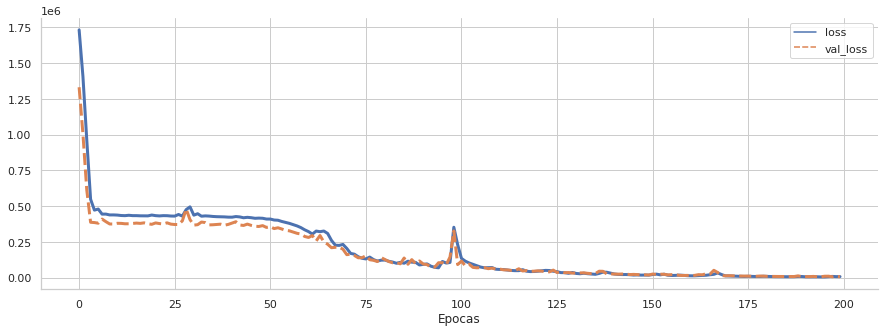

In [24]:
## Hallamos la perdida
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()

In [25]:
## Calculamos el error medio absoluto
prediccion = model.predict(X_test)
print("Error medio absoluto: ",mean_absolute_error(y_test,prediccion))

Error medio absoluto:  54.65958754595587


In [26]:
inv_test = data_final.drop('Price_euros',axis=1).iloc[0]
inv_test.shape ## me vota el número de filas y columnas, 279 filas, que es el 30% de la data

(344,)

In [27]:
print(dataframePCA)

              cp1       cp2       cp3       cp4
0      215.997620 -1.865474  1.739207 -0.596922
1     -224.745805  0.504988  2.080602 -0.527220
2     -548.681150  2.577106 -0.094195  1.423383
3     1413.783629 -0.067467  0.184305 -0.318175
4      679.900841 -4.376527  1.429505 -0.159614
...           ...       ...       ...       ...
1298  -485.703476 -1.900046  0.813490 -0.802754
1299   375.348574  5.161155  2.995868 -0.461479
1300  -894.708956 -1.671714  0.668651 -0.669896
1301  -359.695020 -0.328503 -0.814563 -0.274128
1302  -754.699938 -0.163710 -0.829220 -0.607113

[1303 rows x 4 columns]


In [28]:
## Comparamos el valor real vs el valor de la predicción
print('Real price      : $',data_final.iloc[0]['Price_euros'])
print('Prediction Price: $',model.predict(dataframePCA)[0,0])


Real price      : $ 1339.69
Prediction Price: $ 1274.5074


-------------
ANÁLISIS DE LA RN AJUSTANDO EL NÚMERO DE NEURONAS Y CAPAS
_____________________________________________

In [29]:
model2 = Sequential()
model2.add(Dense(14,activation='relu'))
model2.add(Dense(7,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [30]:
model2.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=200,verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 2212051.6562 - val_loss: 1777455.5000
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 2035375.4844 - val_loss: 1736894.5000
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 1908912.1250 - val_loss: 1700810.7500
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1971927.3906 - val_loss: 1673684.5000
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 1927457.8125 - val_loss: 1656907.5000
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 1879312.7344 - val_loss: 1647760.7500
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 1903018.9531 - val_loss: 1638493.2500
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 1860692.8594 - val_loss: 1629393.6250
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 1926732.4219 - val_loss: 1620435.5000
Epoch 10/200
7/7 

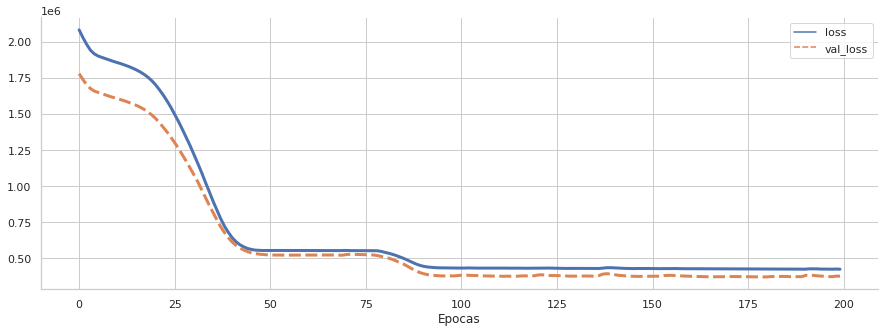

In [31]:
## Caculamos la pérdida del modelo ajustado
loss = pd.DataFrame(model2.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()

In [32]:
## Calculamos el error medio absoluto del modelo ajustado
prediccion = model2.predict(X_test)
print("Error medio absoluto: ",mean_absolute_error(y_test,prediccion))

Error medio absoluto:  519.7127481713259


In [33]:
inv_test = data_final.drop('Price_euros',axis=1).iloc[0]
inv_test.shape ## me vota el número de filas y columnas, 279 filas, que es el 30% de la data

(344,)

In [34]:
## Comparamos el valor real vs el valor de la predicción
print('Real price      : $',data_final.iloc[0]['Price_euros'])
##print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,279)))[0,0])
print('Prediction Price: $',model2.predict(dataframePCA)[0,0])

Real price      : $ 1339.69
Prediction Price: $ 421.22092


Resumen de PCA: De los resultados obtenidos, mejor es el Modelo 1, el error absoluto es menor al Modelo 2 de APC
error medio de $54 vs $ 519

________________________________________________________________________________
ANÁLISIS DE PORCENTAJE DE VARIANZA ACUMULADA

tipo de dato modelo_PCA <class 'sklearn.decomposition._pca.PCA'>
------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25 0.5  0.75 1.  ]
len data_var :  1303


Text(0, 0.5, 'Por. varianza acumulada')

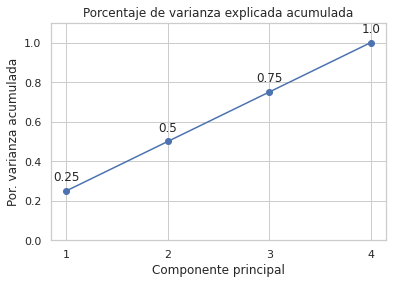

In [35]:
# ==============================================================================
data_var = dataframePCA    ## asignamos los datos de los componentes PCA

# Se extrae el modelo entrenado del pipeline
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_var)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
print("tipo de dato modelo_PCA",type(modelo_pca))

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_var.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

print("len data_var : ",len(data_var))
for x, y in zip(np.arange(len(data_var)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')


Resumen: Si se empleasen únicamente las dos primeros componentes se conseguiría explicar el 50% de la varianza observada, con 3 el 75%, y con los 4 el 100%.